# Trains and  tests on parts of  NA12878 data for Del_st, Del_end and No_sv, ground  truth Mills_nanosv

## Load dependences and setting output configuration

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load data from npy files

In [2]:
import pickle
dico = pickle.load(open("F:/1_GTCG/data/11092018/labels.pickle/labels.pickle", "rb"))
data_labels = dataset = dico["Mills2011_nanosv"]
window_size = 200

In [3]:
dico = []

In [4]:
replications = 6
factor_nosv = 1 # factor_nosv times less Nosv than del-st

In [5]:
datapath = 'F:/1_GTCG/data/TestData_060818.tar/TestData_060818/NA12878' 

germline_1_datapath = datapath + '/ChannelData/unzipped/'
ger_1_labels_datapath = datapath + '/LabelData/unzipped/'

G1_data_SV = np.empty([0, 27, window_size])
G1_labels_SV =[]
G1_data_noSV = np.empty([0, 27, window_size])
G1_labels_noSV =[]
total_train_sv_windows = 0
G1_data_noSV = np.load(germline_1_datapath + "G1_data_noSV_confused.npy")
G1_labels_noSV = np.load(ger_1_labels_datapath + "G1_labels_noSV_confused.npy")
for i in range(1,23,1):
        G1_data_new =np.load(germline_1_datapath + str(i) + '_channel_maker_real_germline.npy/' + str(i) +'_channel_maker_real_germline.npy')
        #G1_labels_new = np.load(ger_1_labels_datapath  +  str(i) +'_label_ci_full_overlap.npy/' +str(i) +'_label_ci_full_overlap.npy') 
        G1_labels_new = np.array(data_labels[str(i)])
        print(G1_labels_new[0])
        G1_data_new = G1_data_new[np.where(G1_labels_new != 'UK')]
        G1_labels_new = G1_labels_new[np.where(G1_labels_new != 'UK')]
        G1_data_SV_new  = G1_data_new[np.where(G1_labels_new != 'noSV')]
        G1_labels_SV_new  = G1_labels_new[np.where(G1_labels_new != 'noSV')]
        n_windows_sv = G1_data_SV_new.shape[0]
        G1_data_noSV_new  = G1_data_new[np.where(G1_labels_new == 'noSV')]
        #G1_labels_noSV_new  = G1_labels_new[np.where(G1_labels_new == 'noSV')]
        #G1_data_noSV_new =  G1_data_noSV_new[0:int(replications*n_windows_sv/2/factor_nosv)]# 4 times less than del_st to boost recall
        #G1_labels_noSV_new =  G1_labels_noSV_new[0:int(replications*n_windows_sv/2/factor_nosv)] # also
        print(str(i) + ':' + str(G1_data_SV_new.shape))
        #print(G1_labels_SV_new[0])
        G1_data_SV = np.concatenate((G1_data_SV, G1_data_SV_new))
        G1_labels_SV = np.concatenate((G1_labels_SV, G1_labels_SV_new))
        #G1_data_noSV = np.concatenate((G1_data_noSV, G1_data_noSV_new))
        #G1_labels_noSV = np.concatenate((G1_labels_noSV, G1_labels_noSV_new))
        if i < 16: #for training until chromozome 16
            total_train_sv_windows += G1_data_SV_new.shape[0]

noSV
1:(222, 27, 200)
noSV
2:(205, 27, 200)
noSV
3:(208, 27, 200)
noSV
4:(228, 27, 200)
noSV
5:(214, 27, 200)
noSV
6:(162, 27, 200)
noSV
7:(163, 27, 200)
noSV
8:(135, 27, 200)
noSV
9:(127, 27, 200)
noSV
10:(107, 27, 200)
noSV
11:(119, 27, 200)
noSV
12:(114, 27, 200)
noSV
13:(106, 27, 200)
noSV
14:(66, 27, 200)
noSV
15:(61, 27, 200)
noSV
16:(47, 27, 200)
noSV
17:(48, 27, 200)
noSV
18:(77, 27, 200)
noSV
19:(44, 27, 200)
noSV
20:(58, 27, 200)
noSV
21:(28, 27, 200)
noSV
22:(21, 27, 200)


### Find  the indexes that split the categories

In [105]:
def find_splitting_indices(labels):
    for i in range (0, labels.shape[0] - 1):
        if (labels[i] != labels[i+1]):
            print(i , ': ', labels[i] , labels[i+1] )        

In [8]:
#G1_labels_SV = ['DEL'] * G1_labels_SV.shape[0]

In [9]:
sv=G1_data_SV.shape[0]

In [10]:
sv

2560

In [11]:
int(sv/2)

1280

In [12]:
nosv = G1_data_noSV.shape[0]
nosv

7975

In [13]:
#G1_data_noSV  = G1_data_noSV[0:2*sv] 

In [14]:
#G1_labels_noSV  = G1_labels_noSV[0:2*sv] 

In [15]:
SV_train =  int(0.8 * total_train_sv_windows)
noSV_train = int(replications * SV_train / 2/factor_nosv)
SV_val = total_train_sv_windows - SV_train
noSV_val = int(replications * SV_val / 2/factor_nosv)

In [16]:
def replicate(data, start, end, howmanytimes): 
    X = data[start:end]
    for i in range(0,howmanytimes):
        X = np.concatenate((X, data[start:end]))
    return X    
    

In [41]:

X_train = replicate(G1_data_SV, 0, SV_train, replications)
y_train = replicate(G1_labels_SV, 0, SV_train,replications)
X_val = replicate(G1_data_SV, SV_train, SV_train+SV_val, replications)
y_val = replicate(G1_labels_SV, SV_train, SV_train+SV_val, replications)
X_test = replicate(G1_data_SV, SV_train+SV_val, len(G1_data_SV), replications)
y_test = replicate(G1_labels_SV, SV_train+SV_val, len(G1_labels_SV), replications)

In [42]:
def eliminate_noise_chanels(X):
    return np.delete(X, [4-1,5-1,6-1,7-1,8-1,9-1,10-1,12-1,13-1,15-1,16-1, 17-1,18-1,19-1,23-1,24-1,26-1,27-1], axis=1)
    

def eliminate_distance_chanels(X):
    return np.delete(X, [3,4,7,8], axis=1)

X_train = eliminate_noise_chanels(X_train)
X_val = eliminate_noise_chanels(X_val)
X_test = eliminate_noise_chanels(X_test)

X_train = eliminate_distance_chanels(X_train)
X_val = eliminate_distance_chanels(X_val)
X_test = eliminate_distance_chanels(X_test)

In [43]:
X_train = np.concatenate((X_train, G1_data_noSV[0:noSV_train ]))
X_val = np.concatenate((X_val, G1_data_noSV[noSV_train:noSV_train +noSV_val ]))
X_test = np.concatenate((X_test, G1_data_noSV[noSV_train +noSV_val:]))

In [44]:
G1_labels_noSV = ['noSV' for i in G1_labels_noSV]

In [45]:
y_train = np.concatenate((y_train, G1_labels_noSV[0:noSV_train ]))
y_val = np.concatenate((y_val, G1_labels_noSV[noSV_train:noSV_train +noSV_val ]))
y_test = np.concatenate((y_test, G1_labels_noSV[noSV_train +noSV_val:]))

### Number of training, validation and test windows

In [46]:
X_train.shape

(17890, 5, 200)

In [47]:
X_val.shape

(4480, 5, 200)

In [48]:
X_test.shape

(3525, 5, 200)

In [49]:
y_test.shape

(3525,)

In [50]:
number_channels = X_train.shape[1]
number_channels

5

## Normalize data using the reads coverage as parameter and remove uninteresting channels for deletions

In [51]:
coverage = np.median(X_train[:, 0, :]) #the median of the coverage in the normal cells
coverage


40.0

In [52]:
def normalize(X):       
    for i in range (0, len(X)):                              
        for j in range(0,number_channels):                                                                                            
            X[i][j] = np.divide(X[i][j], coverage)*100 
normalize(X_train)
normalize(X_val)
normalize(X_test)

In [53]:
X_train.shape

(17890, 5, 200)

In [54]:
number_channels = X_train.shape[1]
number_channels

5

## Differentiate the time series for a zero mean

In [ ]:
def differentiate(X):
    for i in range(0, X.shape[0]):        
        for j in range(0, X.shape[1]):
            for k in range(0, X.shape[2]-1):
                X[i][j][k] = X[i][j][k+1] - X[i][j][k]
    return X[:,:,:-1]        

In [ ]:
#X_train = differentiate(X_train)

In [ ]:
#X_val = differentiate(X_val)
#X_test = differentiate(X_test)

## Plots several  windows

In [88]:
n_windows = 100
label = ["None"] * number_channels

In [89]:
label[0] = "germline:coverage"
label[1] = "germline:#left clipped reads"
label[2] = "germline:#right clipped reads"
label[3] = "germline:#split reads right split"
label[4] = "germline:#split reads left split"

In [90]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 1):
        #if y_test[i] == labels[predicted[i]]:
            #continue
        #print(y_train[i], 'id:', i)
        print('id:', i)
        print('Nanopore:', y_test[i])#, '. DeepSV:', labels[predicted[i]])
        for j in range (0, number_channels):   
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 8:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_test[i][j]]  
            plt.ylim([150,450])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_test[i][j]]  
            if j>8:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 9])
            else:
                plt.plot(Z,  label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})    
        plt.show()

id: 0
Nanopore: 1


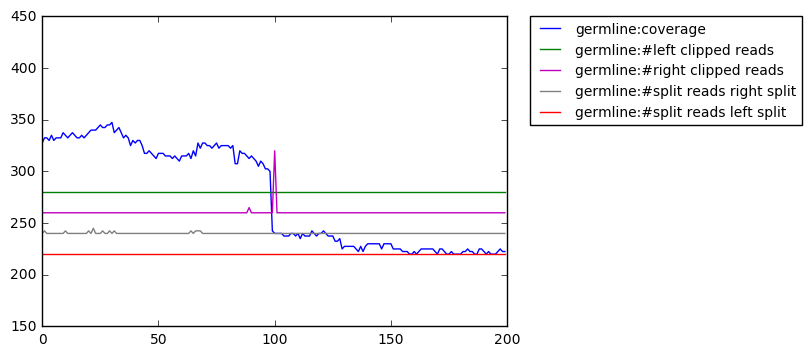

id: 1
Nanopore: 0


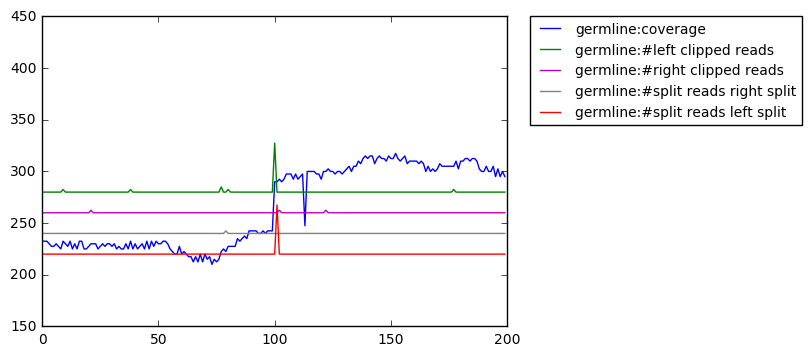

id: 2
Nanopore: 1


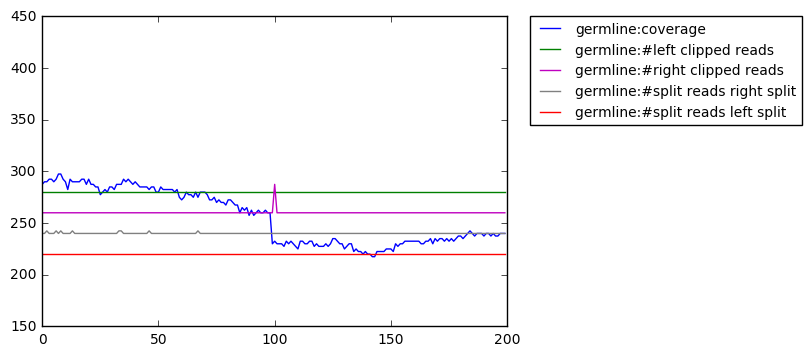

id: 3
Nanopore: 0


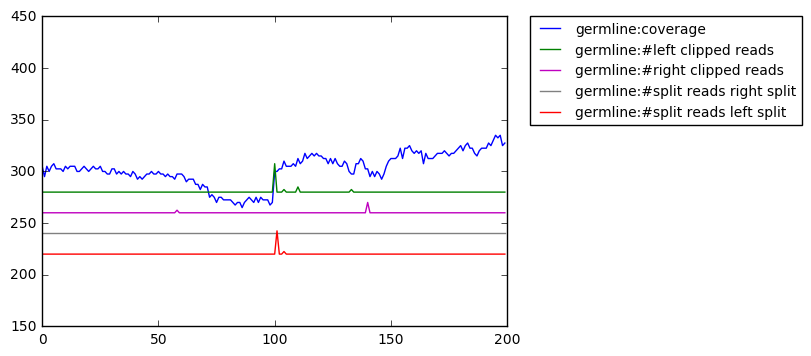

id: 4
Nanopore: 0


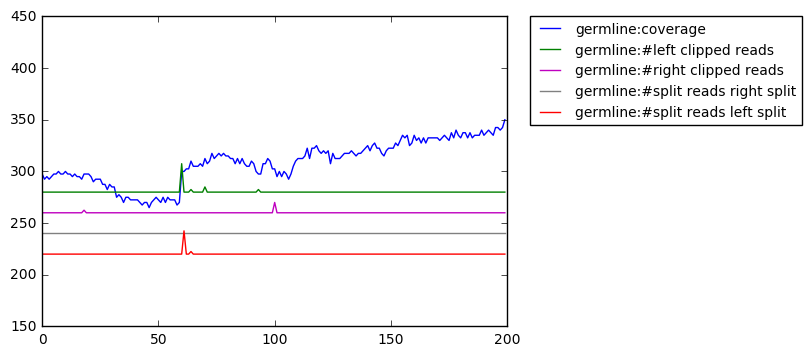

id: 5
Nanopore: 1


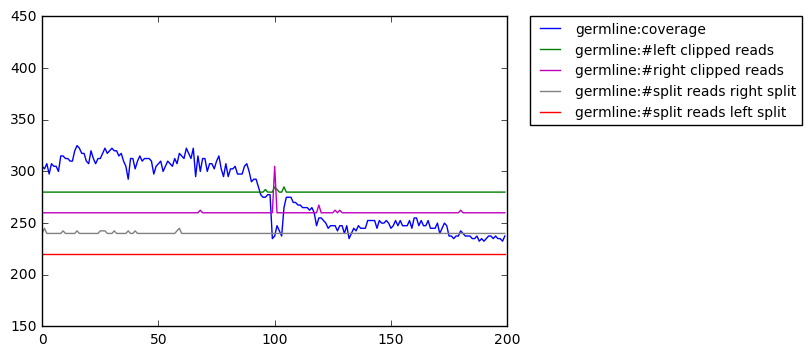

id: 6
Nanopore: 1


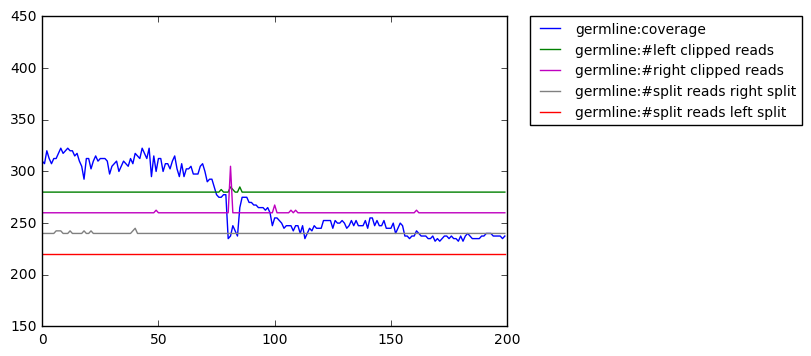

id: 7
Nanopore: 0


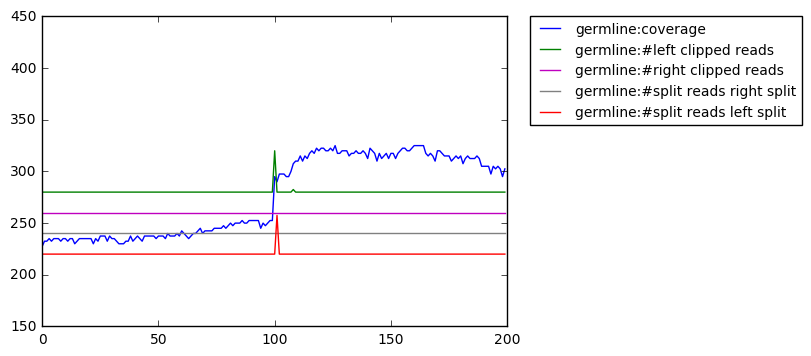

id: 8
Nanopore: 1


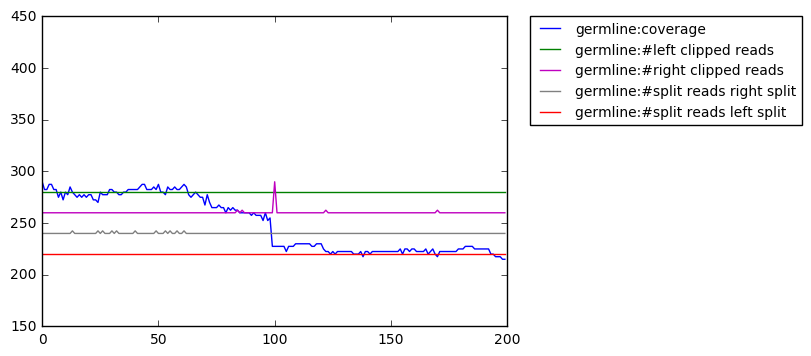

id: 9
Nanopore: 0


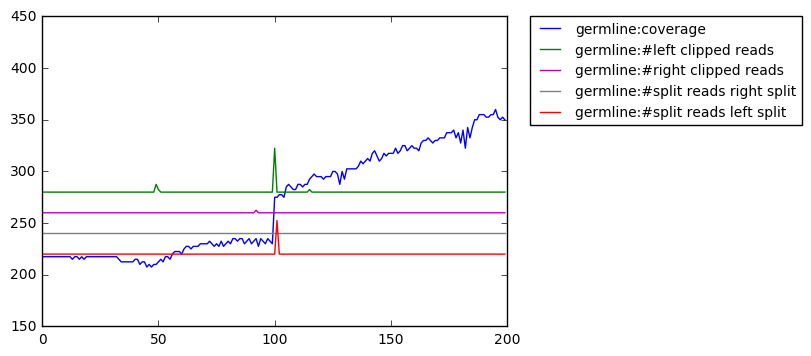

id: 10
Nanopore: 1


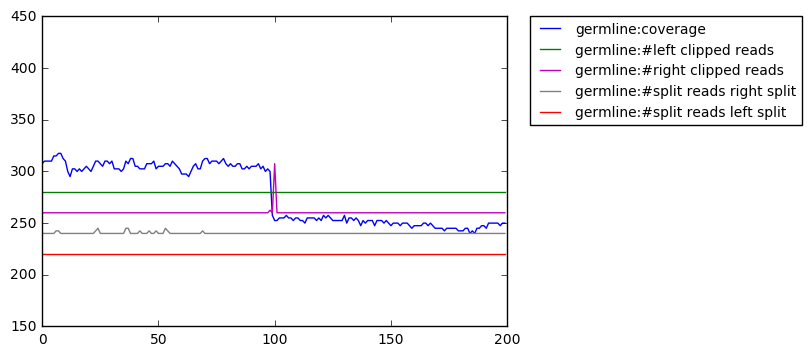

id: 11
Nanopore: 1


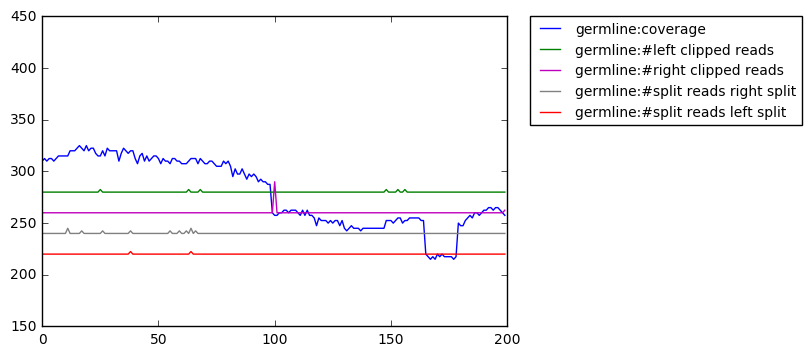

id: 12
Nanopore: 0


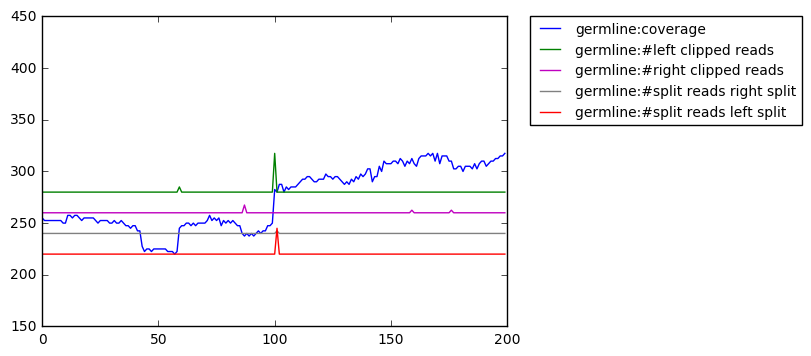

id: 13
Nanopore: 1


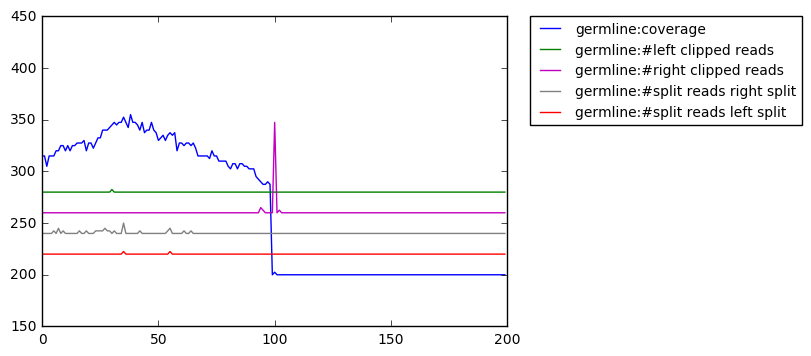

id: 14
Nanopore: 0


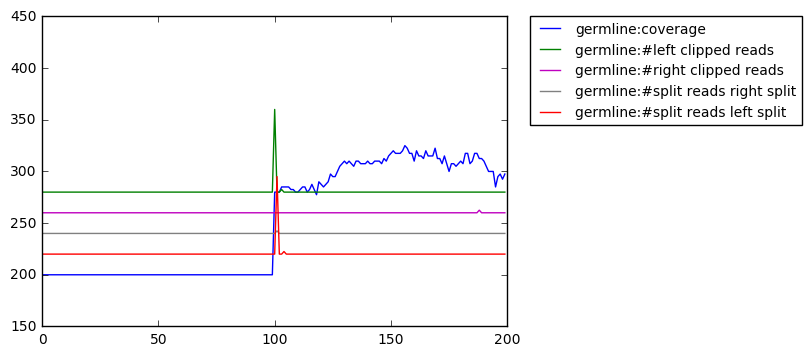

id: 15
Nanopore: 1


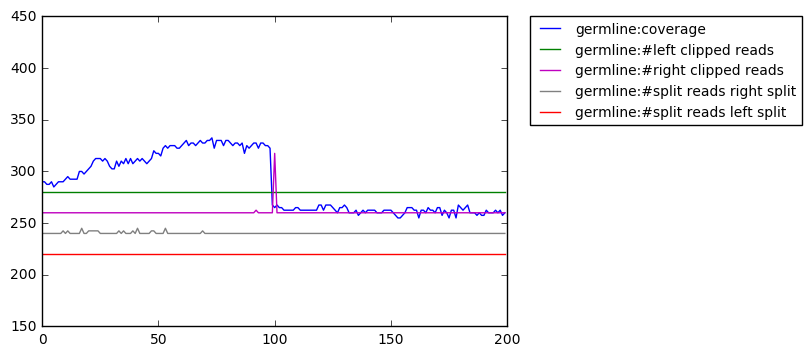

id: 16
Nanopore: 1


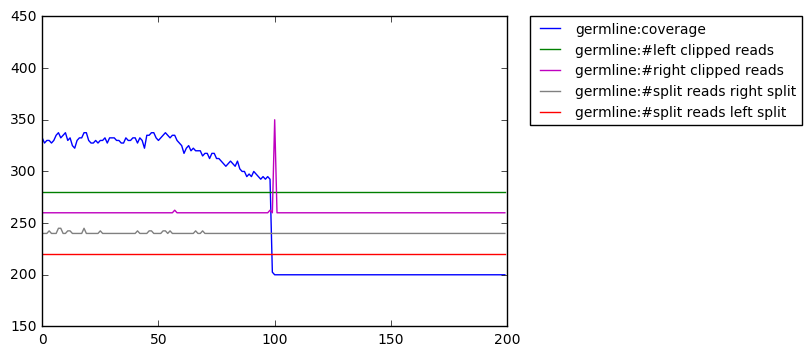

id: 17
Nanopore: 0


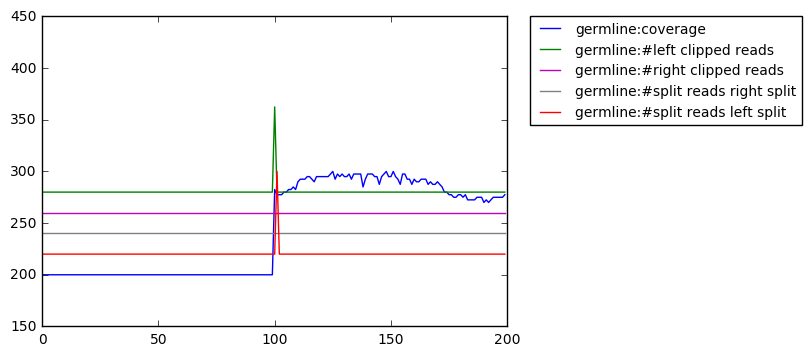

id: 18
Nanopore: 1


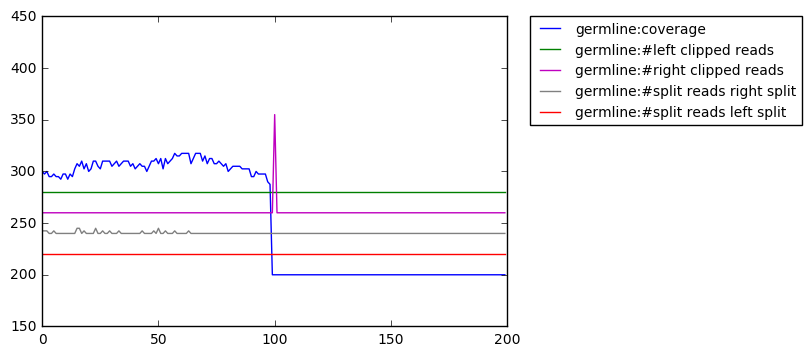

id: 19
Nanopore: 0


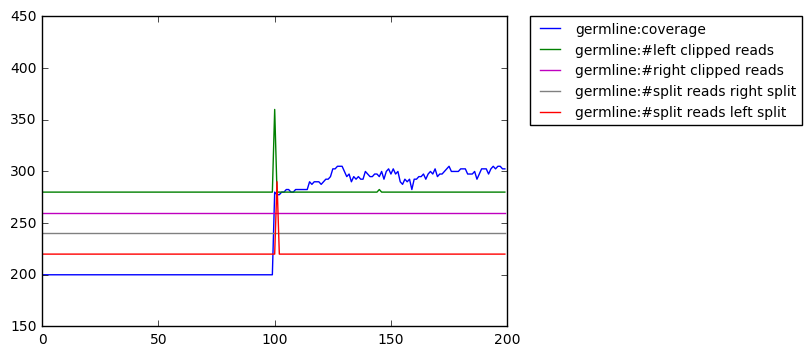

id: 20
Nanopore: 1


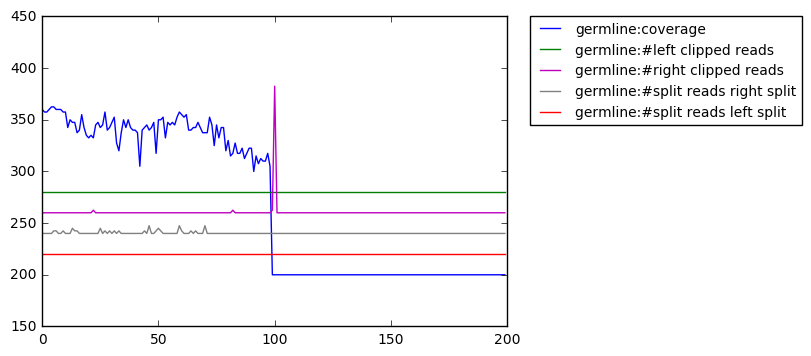

id: 21
Nanopore: 1


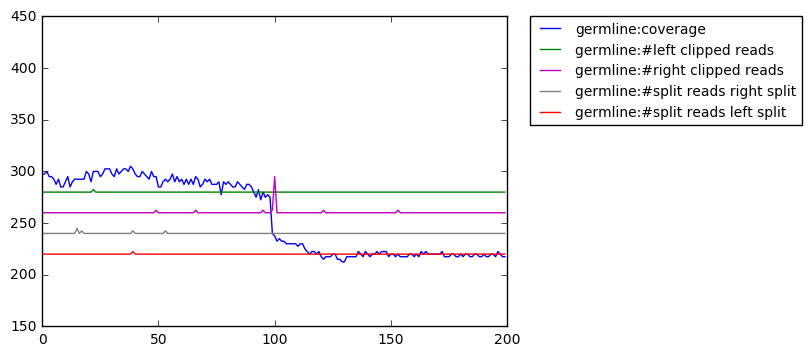

id: 22
Nanopore: 0


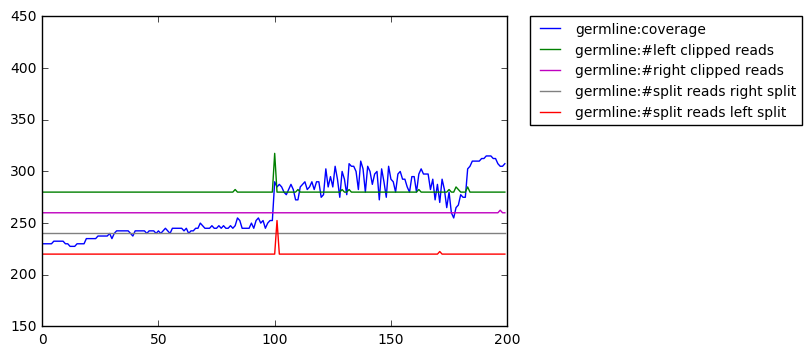

id: 23
Nanopore: 1


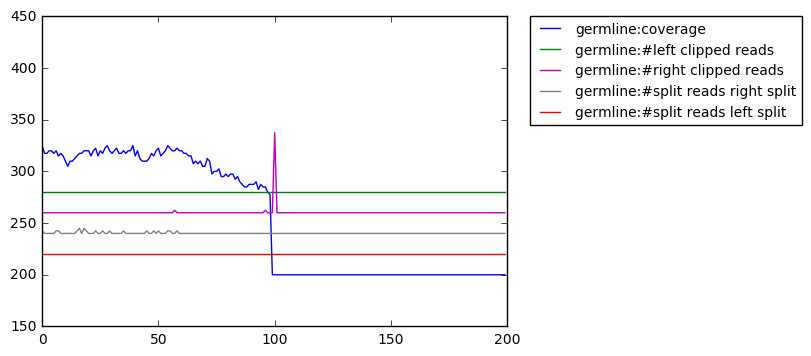

id: 24
Nanopore: 0


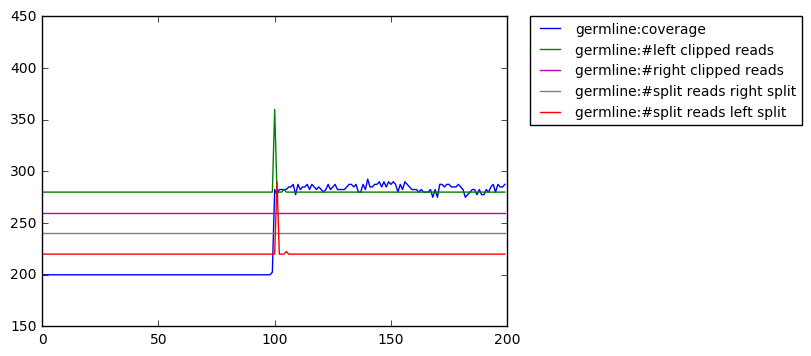

id: 25
Nanopore: 1


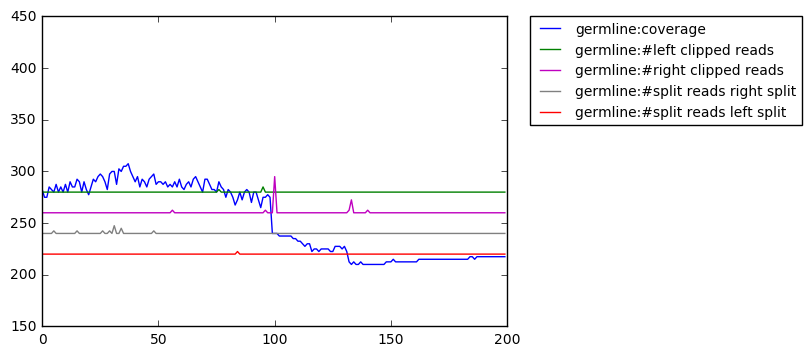

id: 26
Nanopore: 0


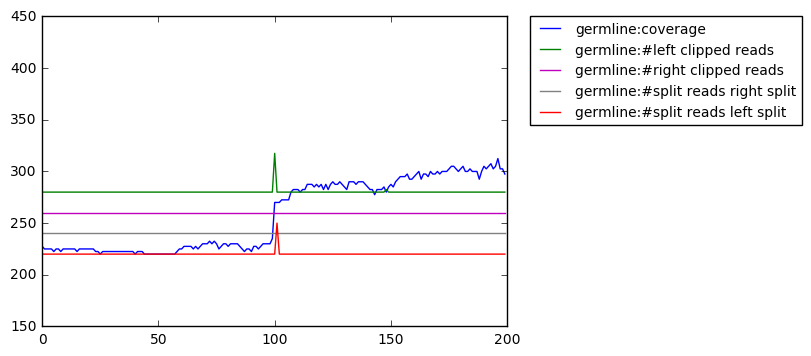

id: 27
Nanopore: 1


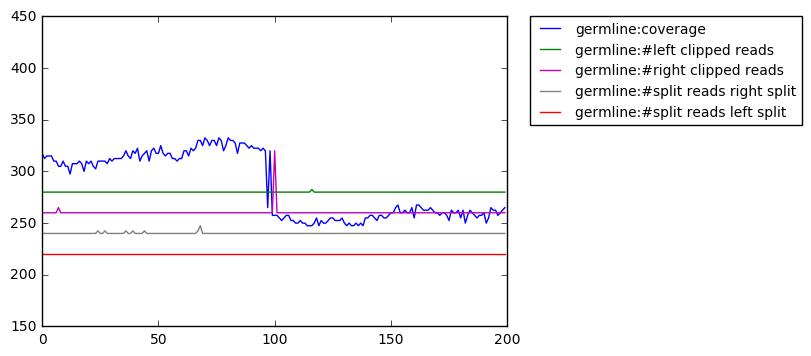

id: 28
Nanopore: 1


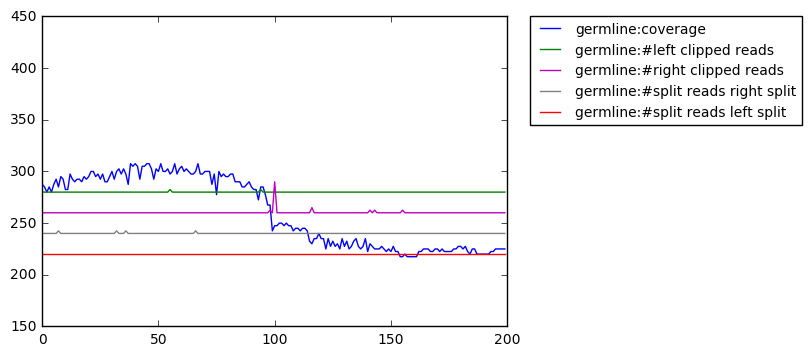

id: 29
Nanopore: 1


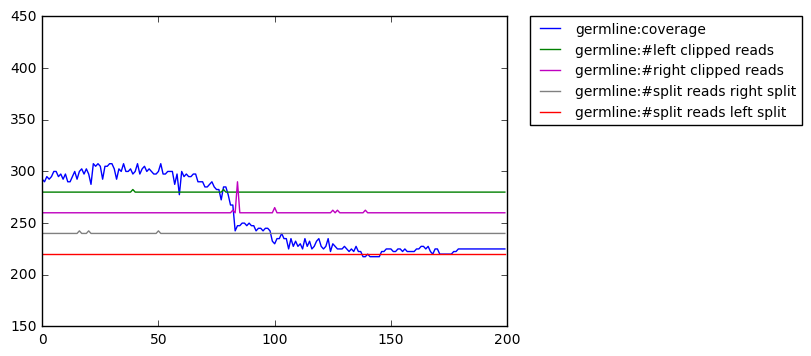

id: 30
Nanopore: 0


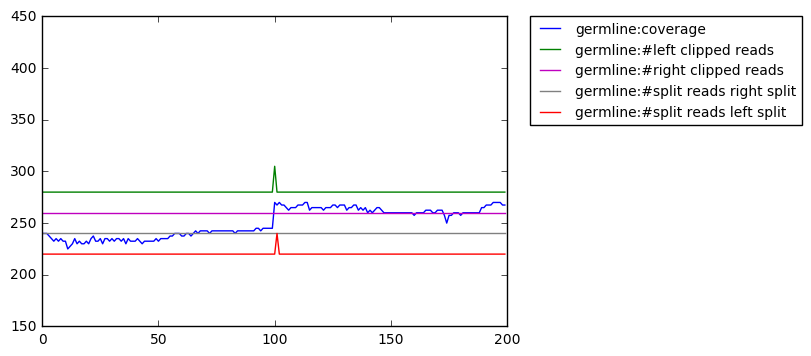

id: 31
Nanopore: 1


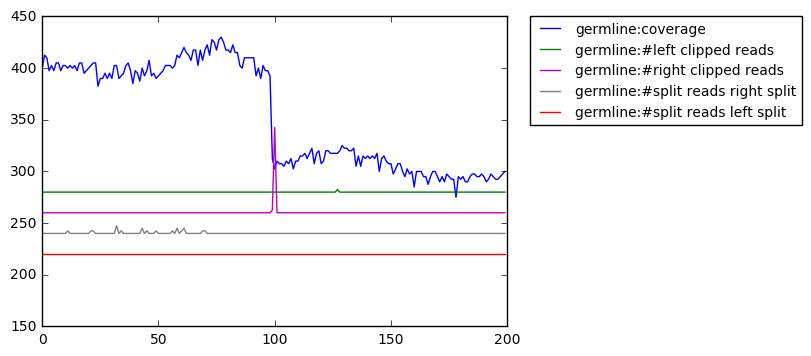

id: 32
Nanopore: 0


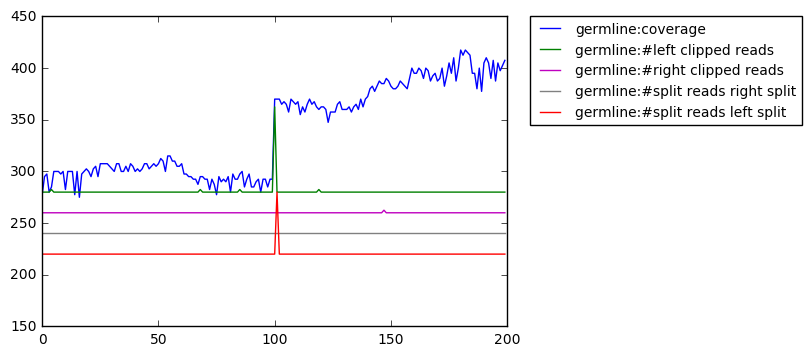

id: 33
Nanopore: 1


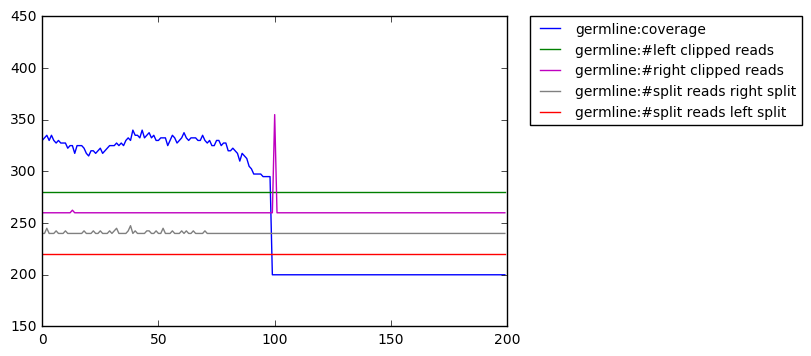

id: 34
Nanopore: 0


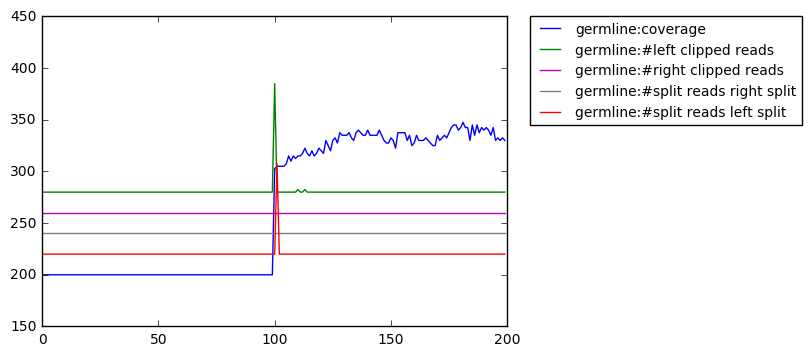

id: 35
Nanopore: 0


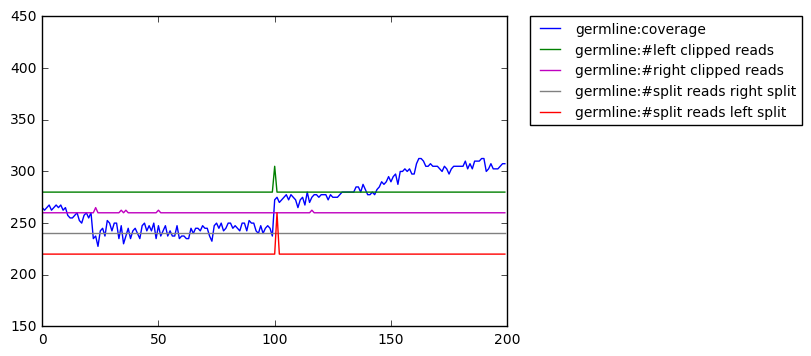

id: 36
Nanopore: 1


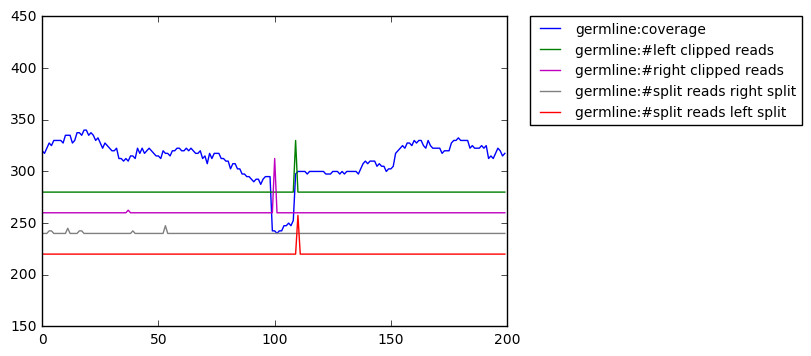

id: 37
Nanopore: 1


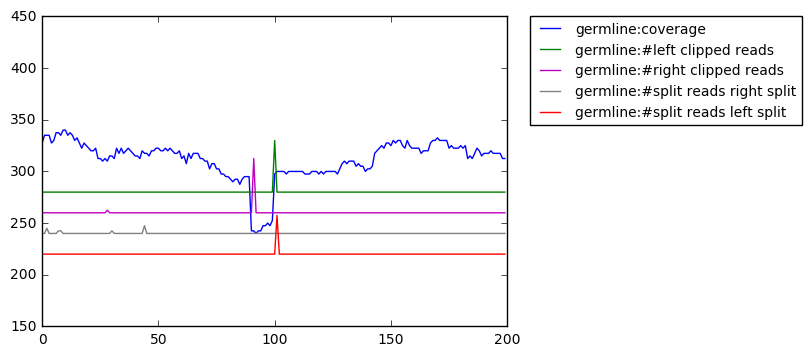

id: 38
Nanopore: 0


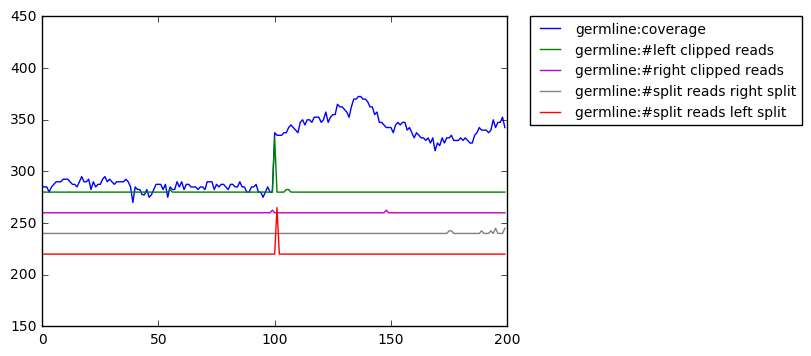

id: 39
Nanopore: 1


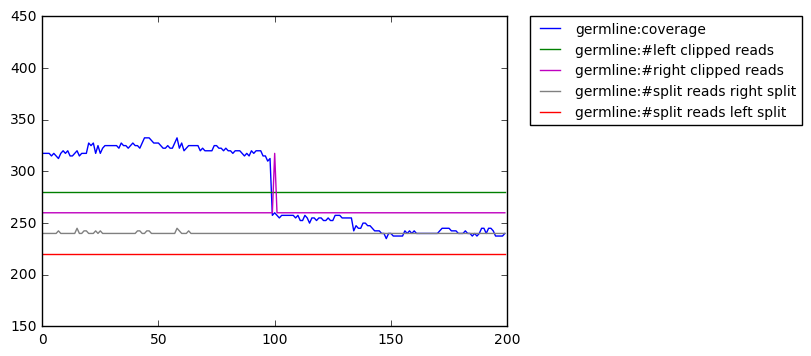

id: 40
Nanopore: 1


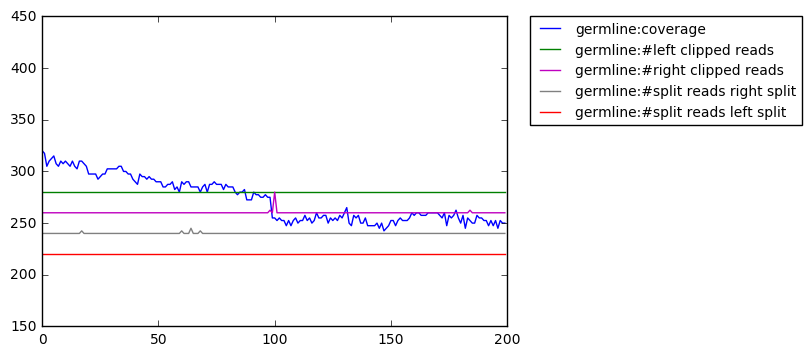

id: 41
Nanopore: 1


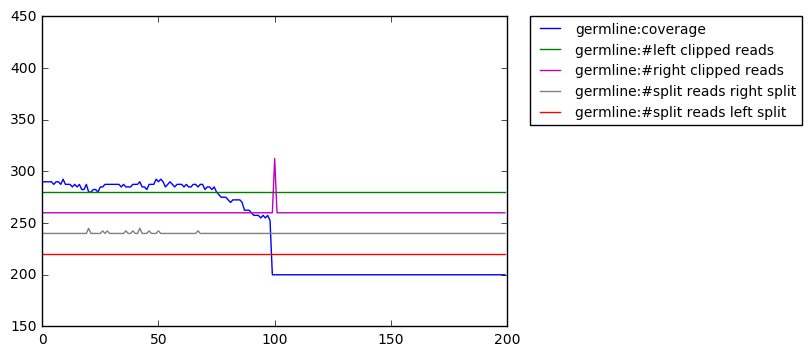

id: 42
Nanopore: 0


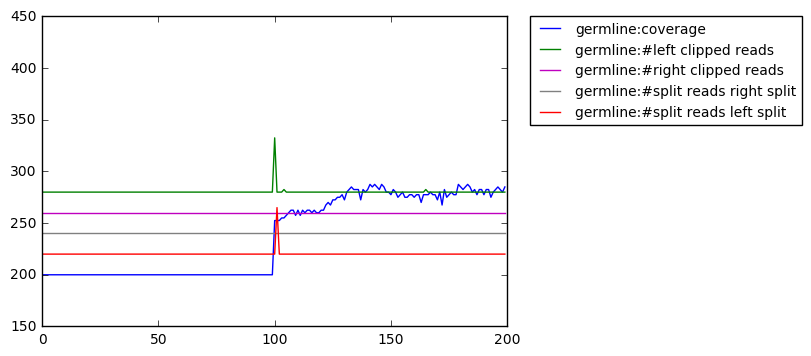

id: 43
Nanopore: 0


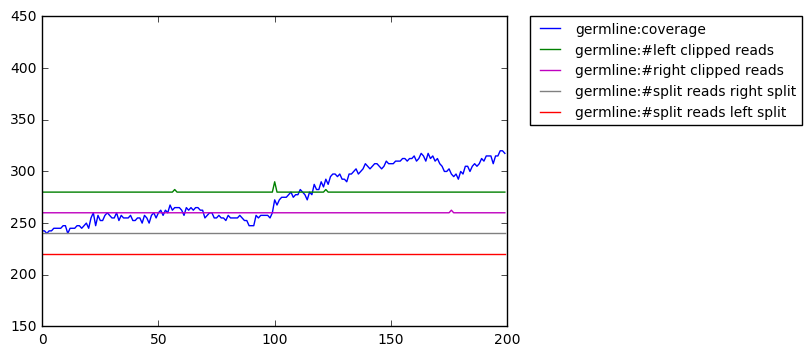

id: 44
Nanopore: 1


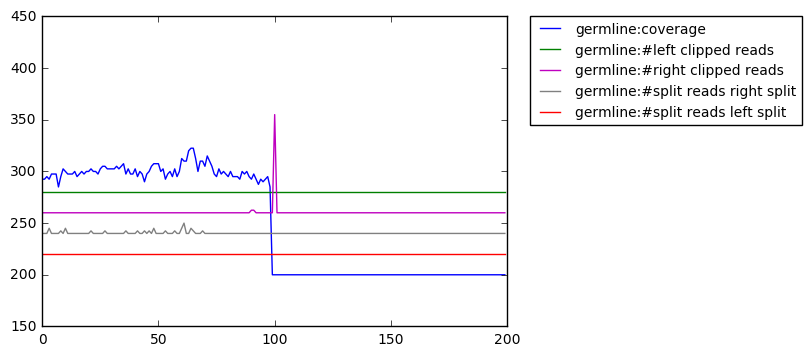

id: 45
Nanopore: 0


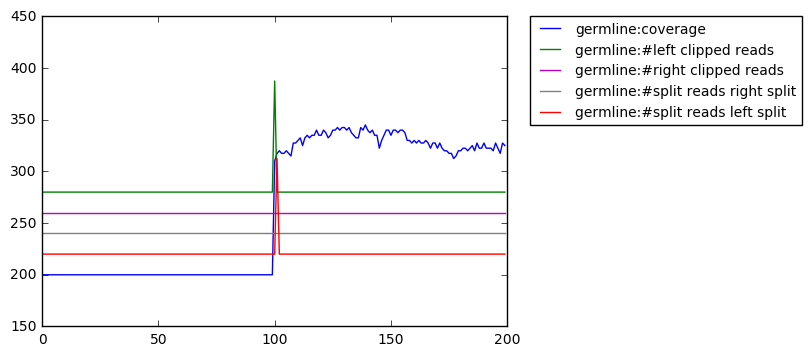

id: 46
Nanopore: 1


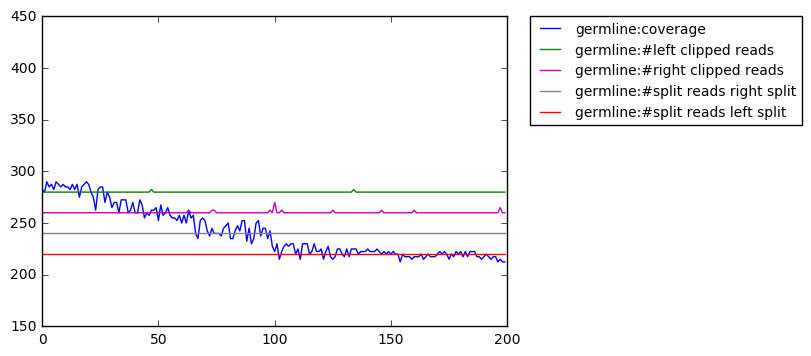

id: 47
Nanopore: 0


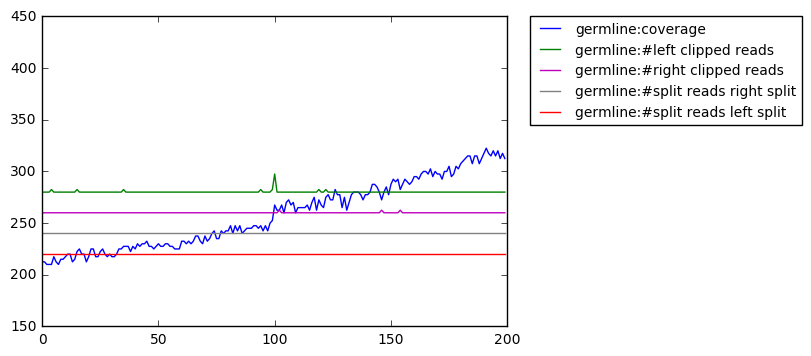

id: 48
Nanopore: 1


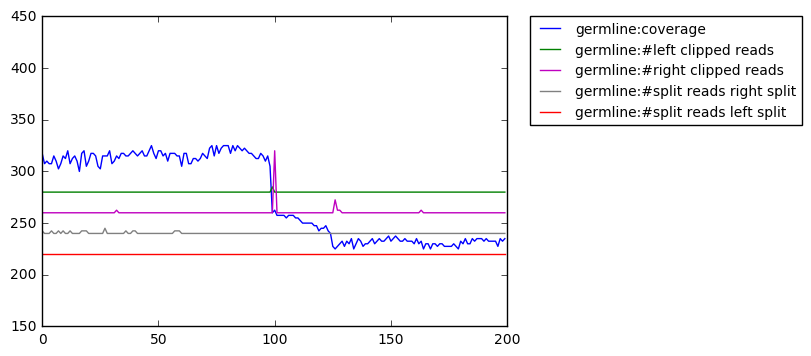

id: 49
Nanopore: 1


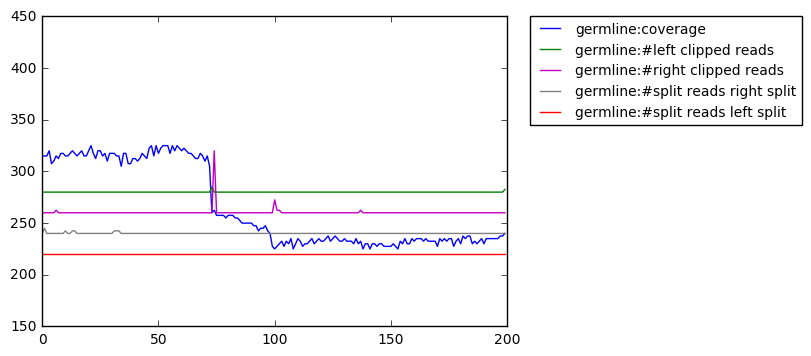

id: 50
Nanopore: 0


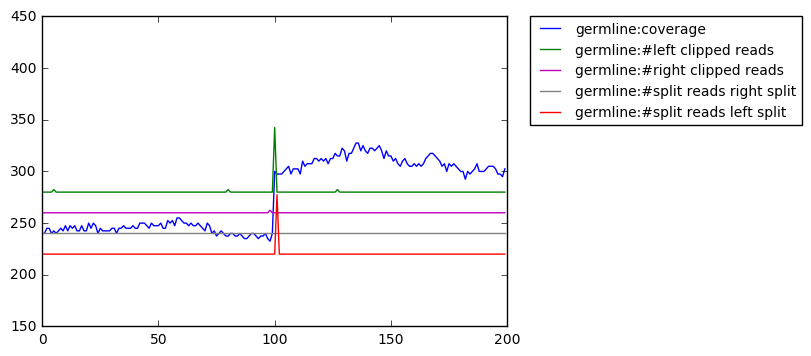

id: 51
Nanopore: 1


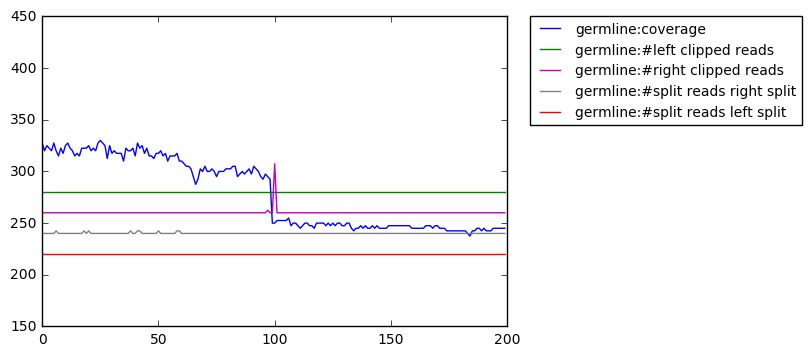

id: 52
Nanopore: 0


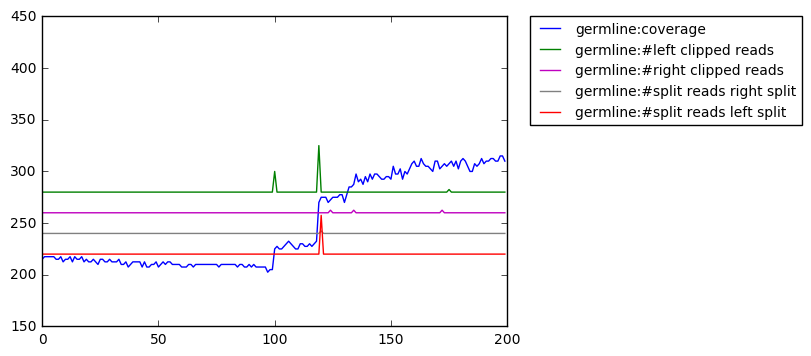

id: 53
Nanopore: 0


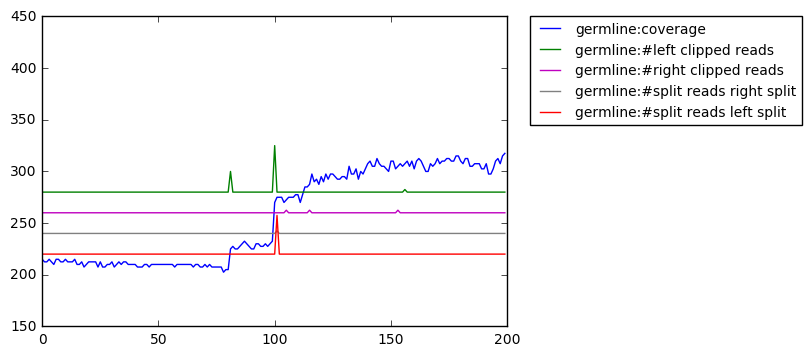

id: 54
Nanopore: 1


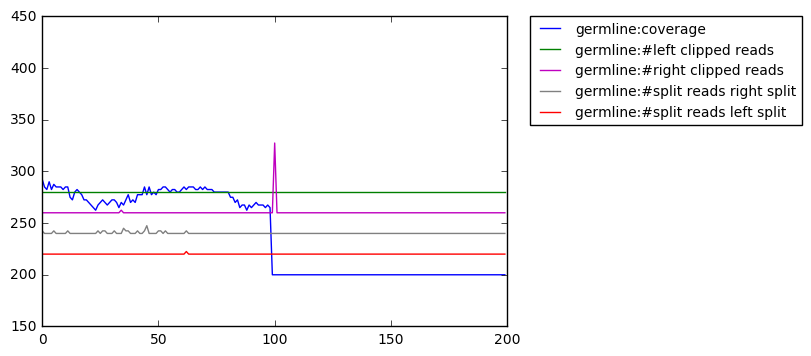

id: 55
Nanopore: 0


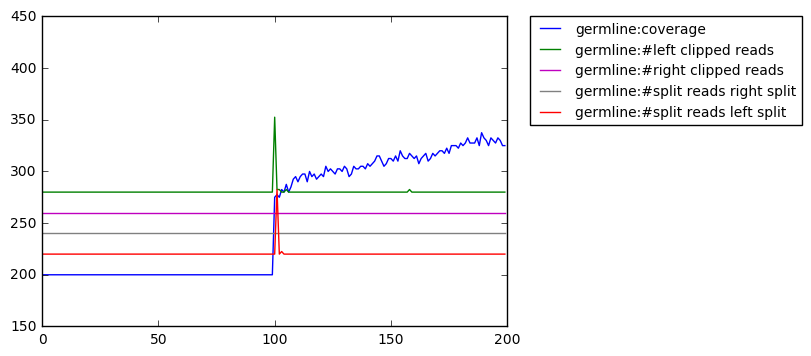

id: 56
Nanopore: 1


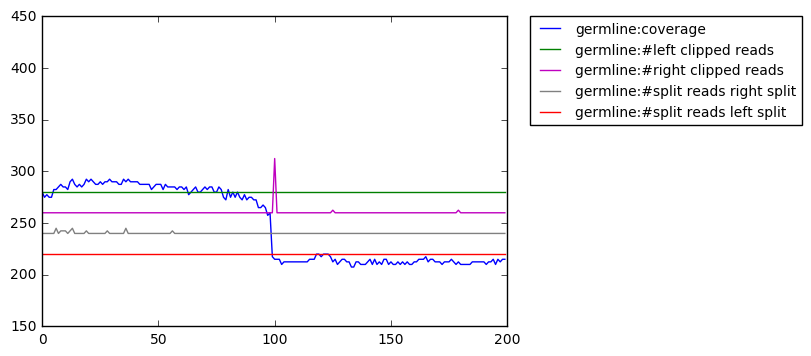

In [92]:
start_window = 0
n_windows = 57
plot_channels(start_window, n_windows)

id: 500
Nanopore: 1


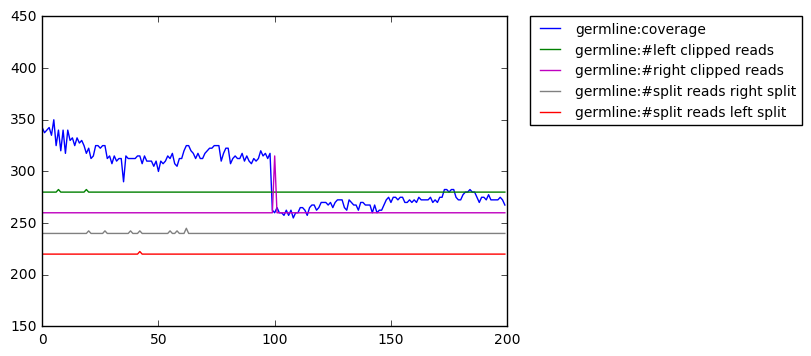

id: 501
Nanopore: 1


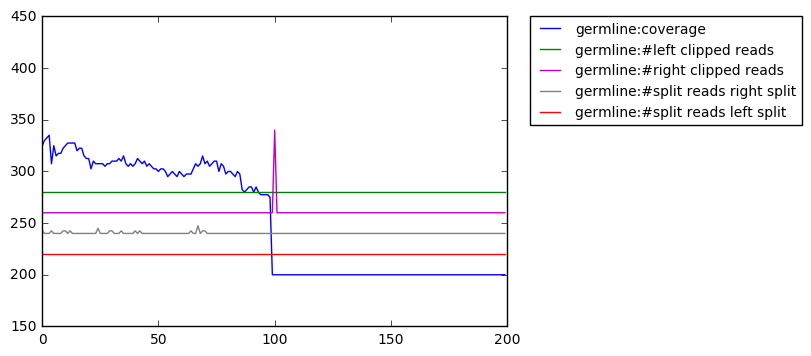

id: 502
Nanopore: 0


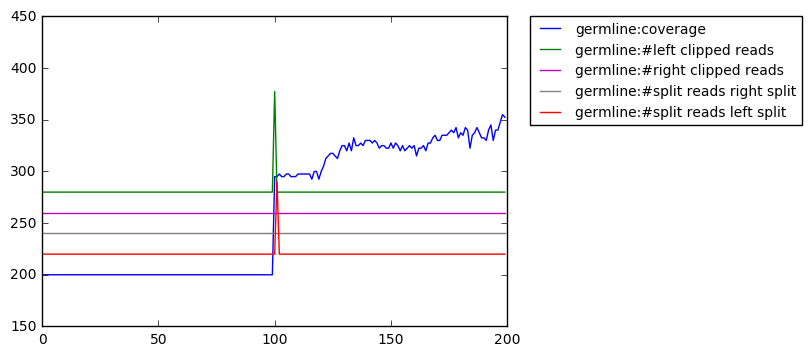

id: 503
Nanopore: 1


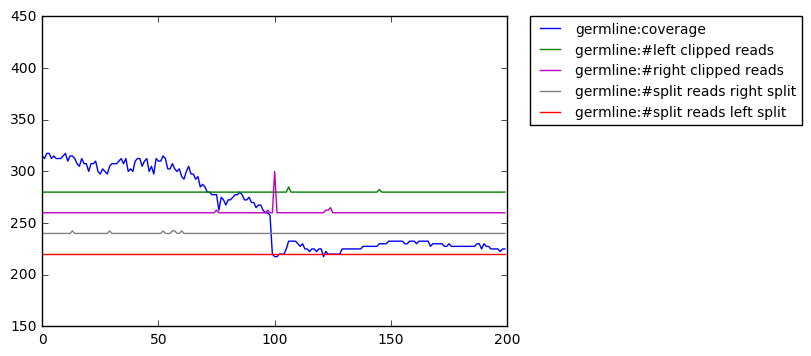

id: 504
Nanopore: 0


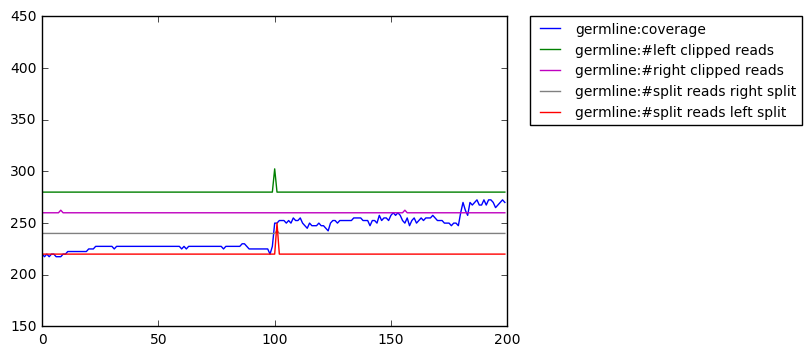

id: 505
Nanopore: 1


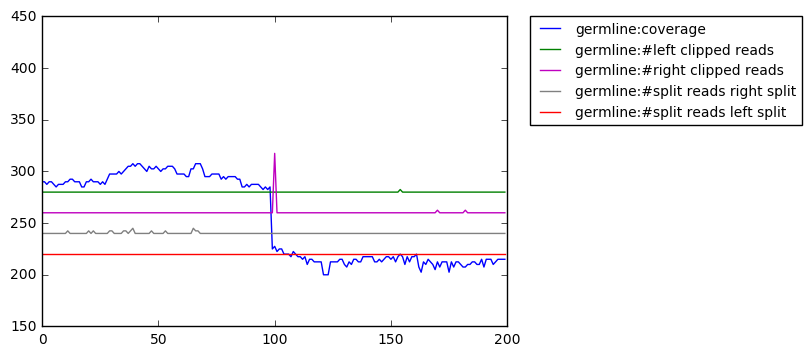

id: 506
Nanopore: 0


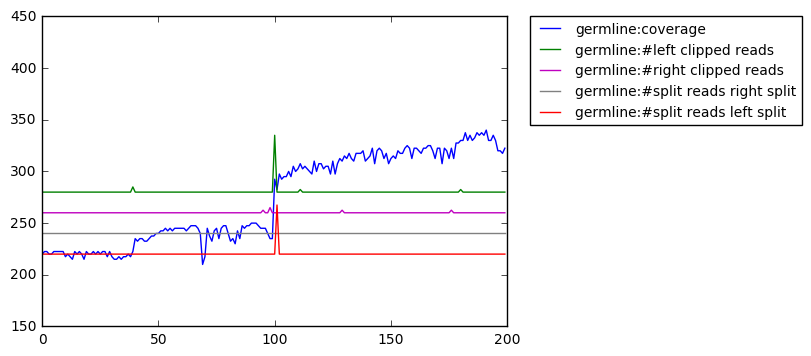

id: 507
Nanopore: 1


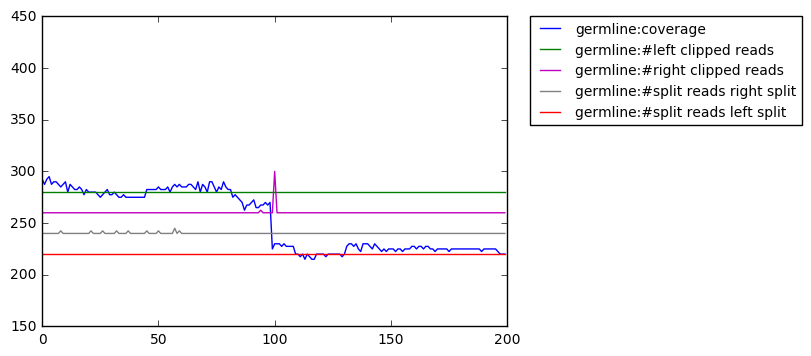

id: 508
Nanopore: 0


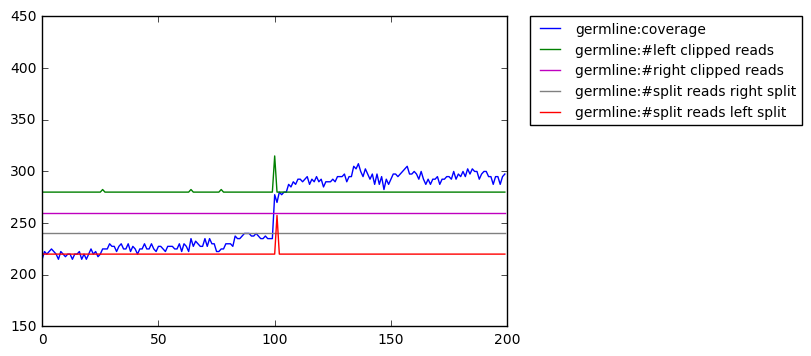

id: 509
Nanopore: 1


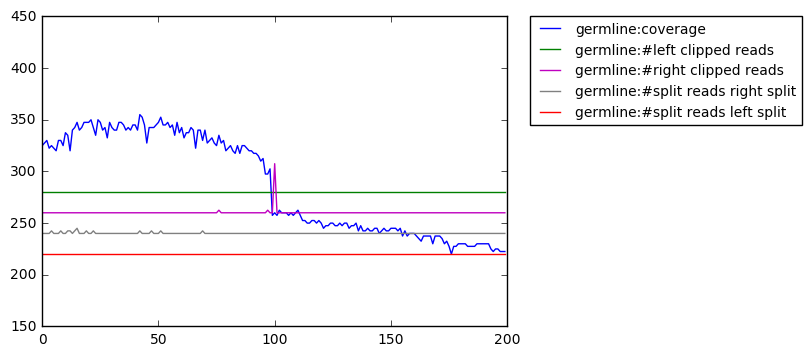

id: 510
Nanopore: 0


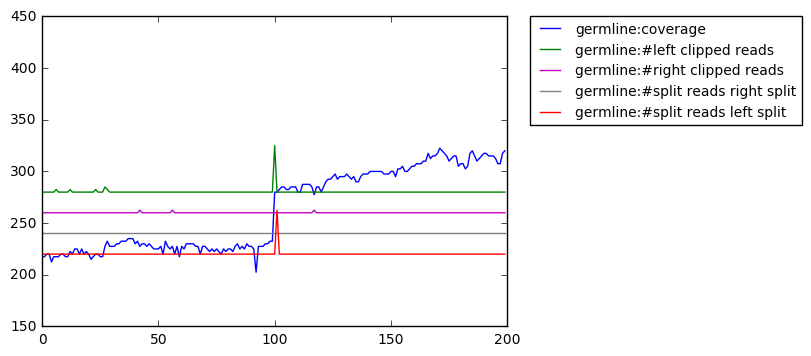

id: 511
Nanopore: 1


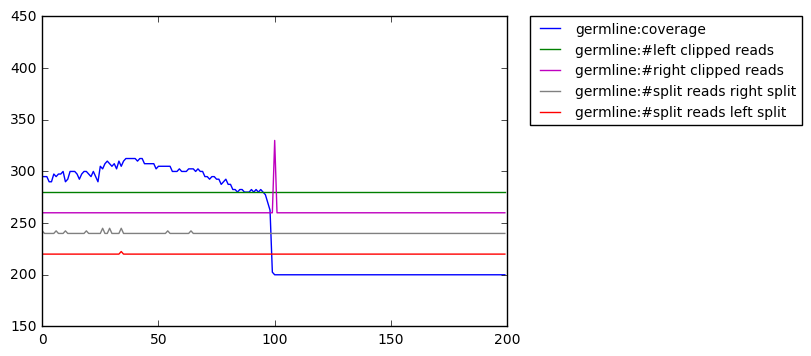

id: 512
Nanopore: 0


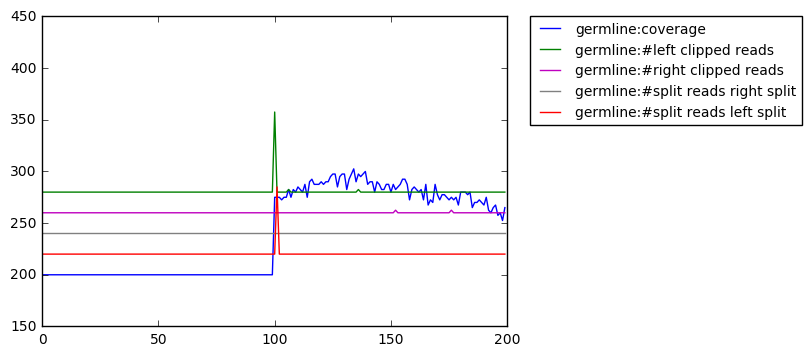

id: 513
Nanopore: 1


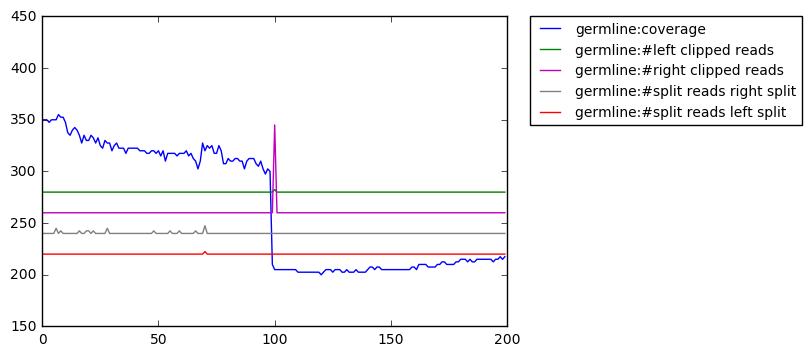

id: 514
Nanopore: 0


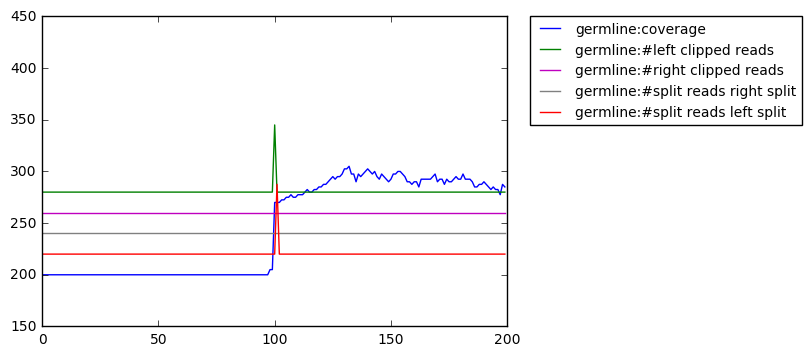

id: 515
Nanopore: 1


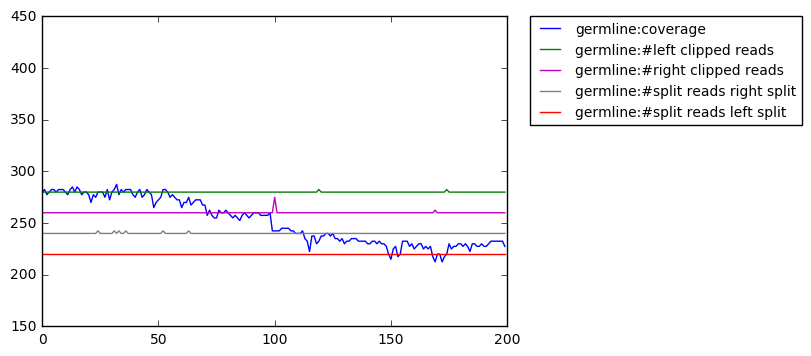

id: 516
Nanopore: 0


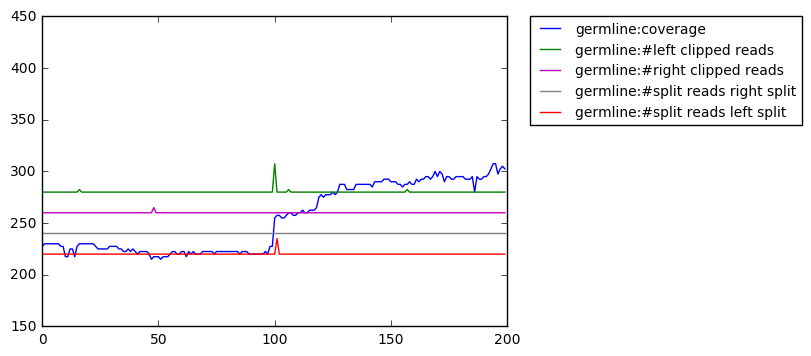

id: 517
Nanopore: 1


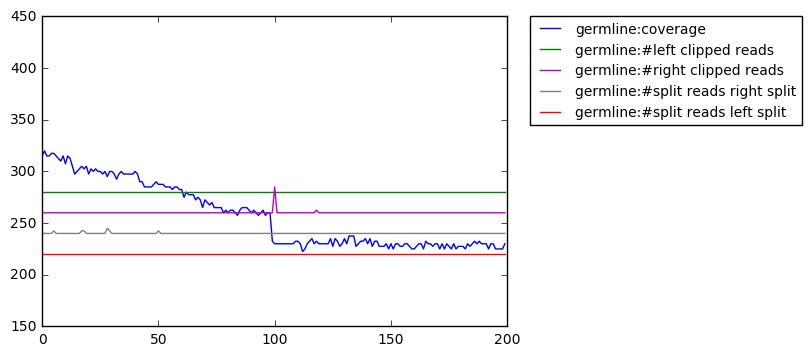

id: 518
Nanopore: 1


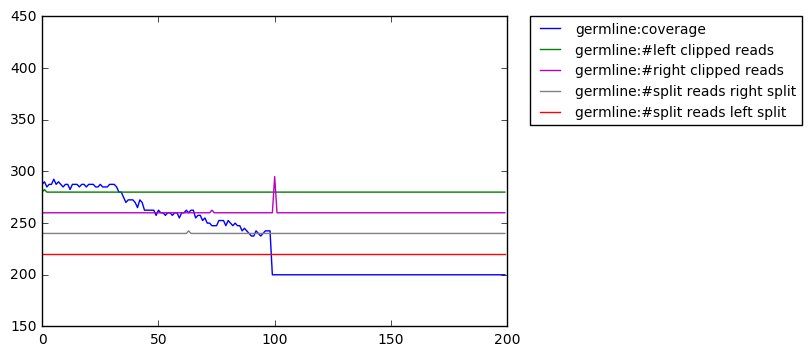

id: 519
Nanopore: 1


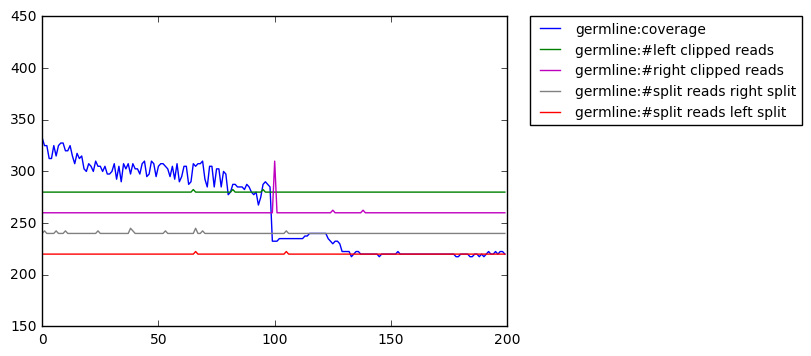

id: 520
Nanopore: 0


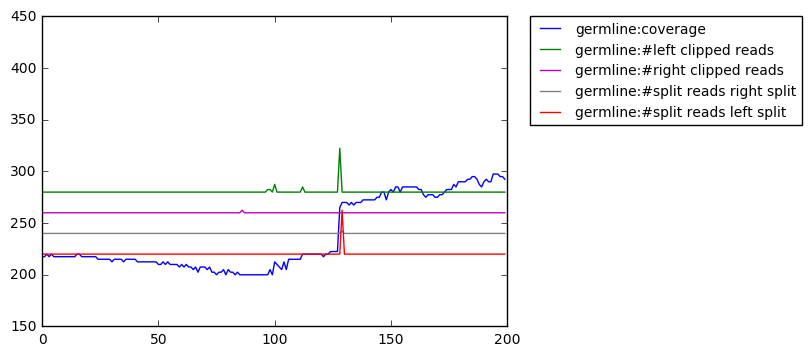

id: 521
Nanopore: 0


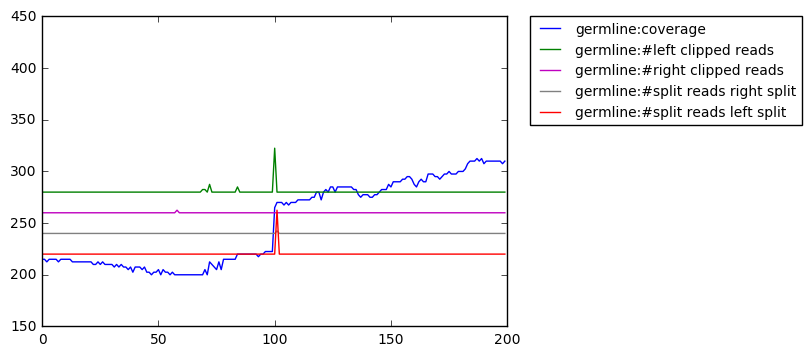

id: 522
Nanopore: 1


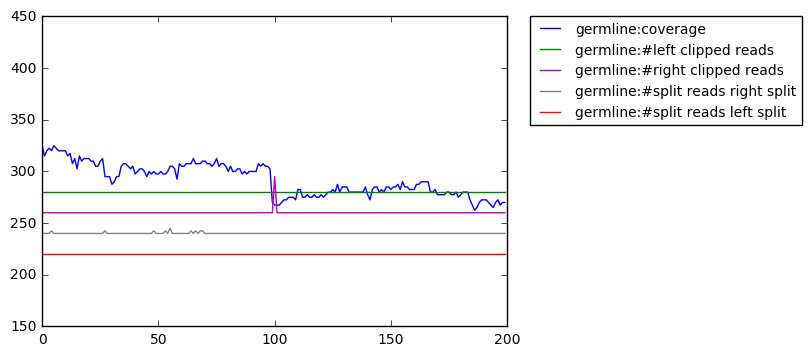

id: 523
Nanopore: 0


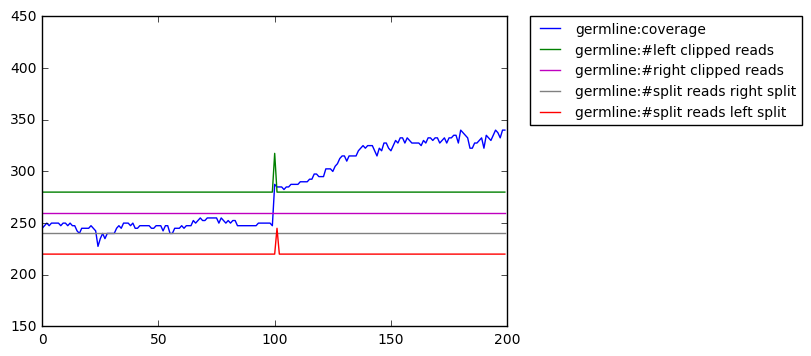

id: 524
Nanopore: 1


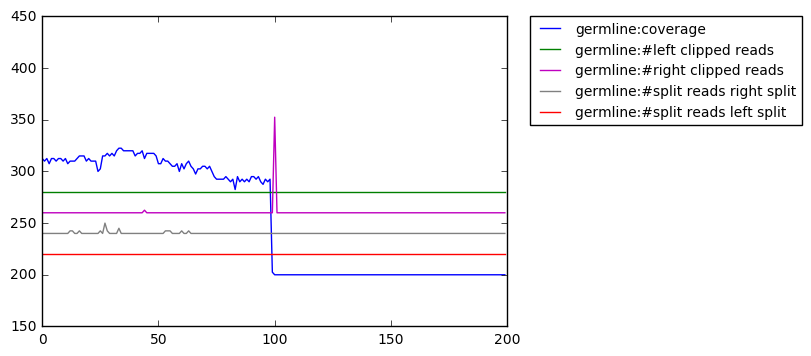

id: 525
Nanopore: 0


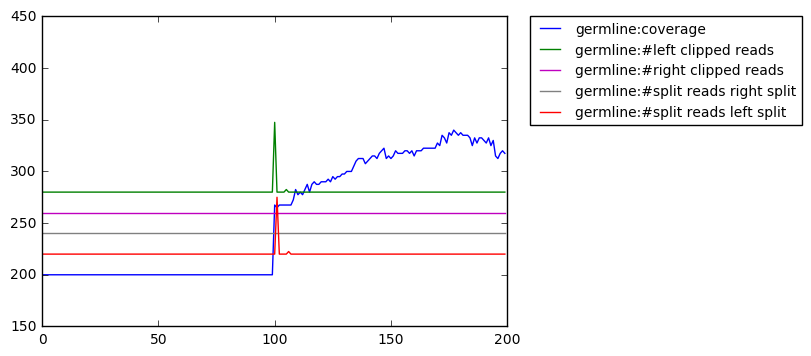

id: 526
Nanopore: 1


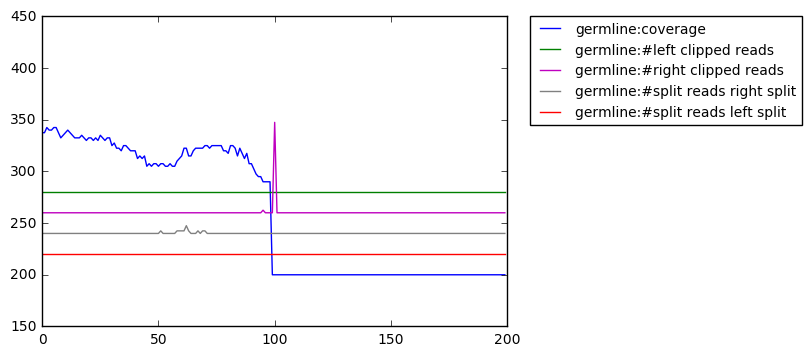

id: 527
Nanopore: 0


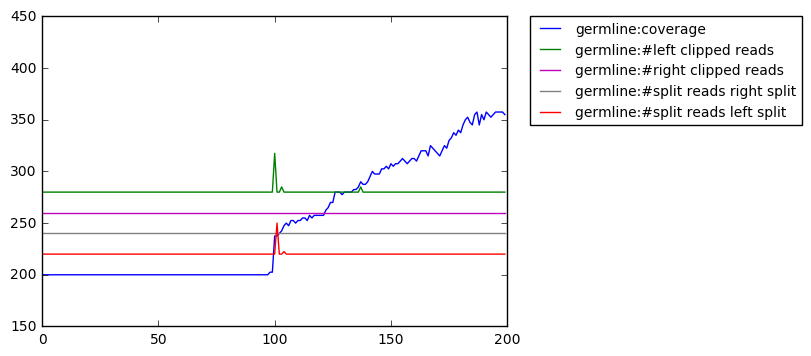

id: 528
Nanopore: 1


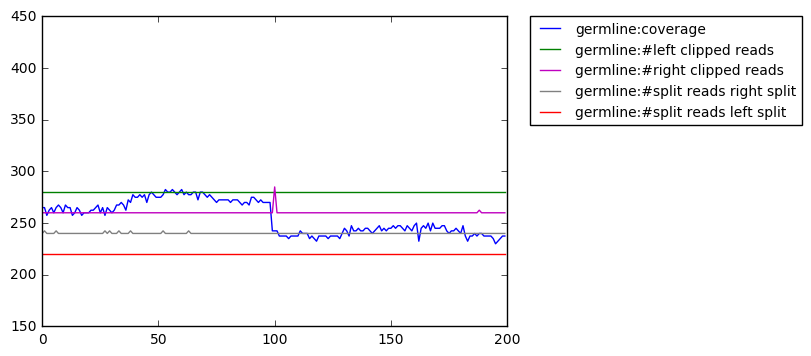

id: 529
Nanopore: 0


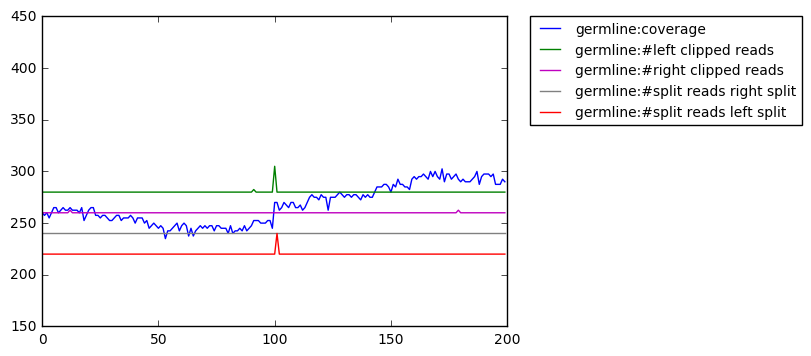

id: 530
Nanopore: 1


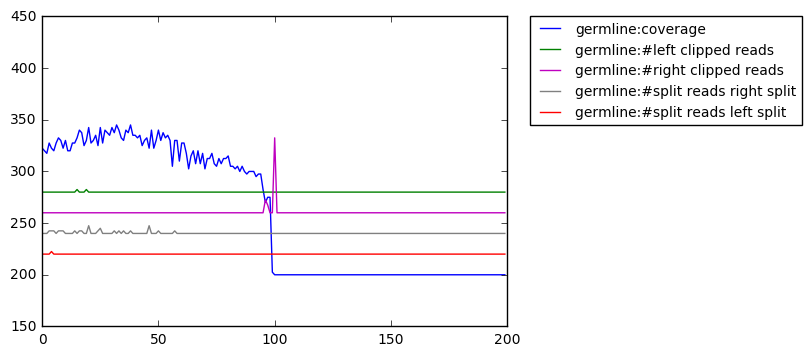

id: 531
Nanopore: 1


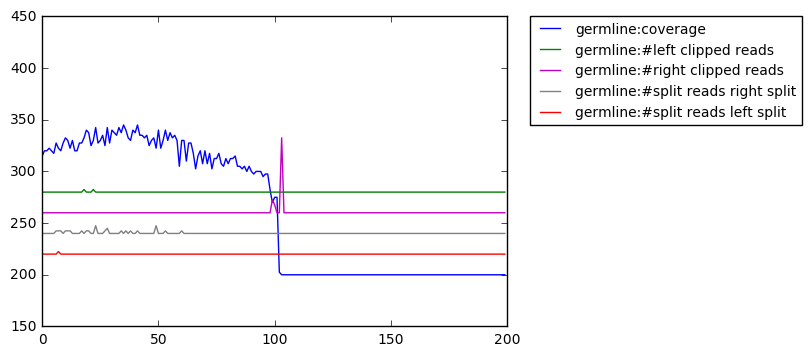

id: 532
Nanopore: 1


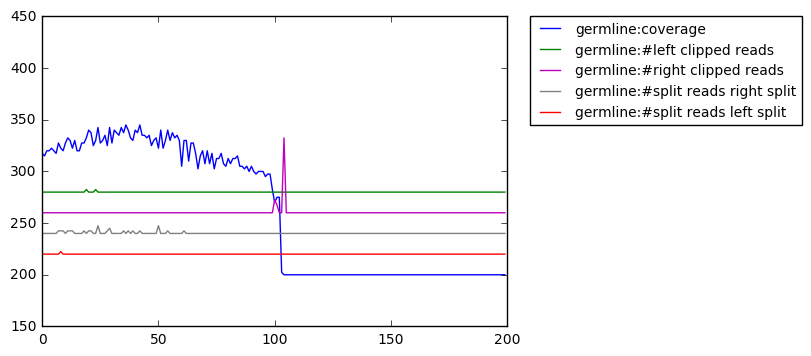

id: 533
Nanopore: 1


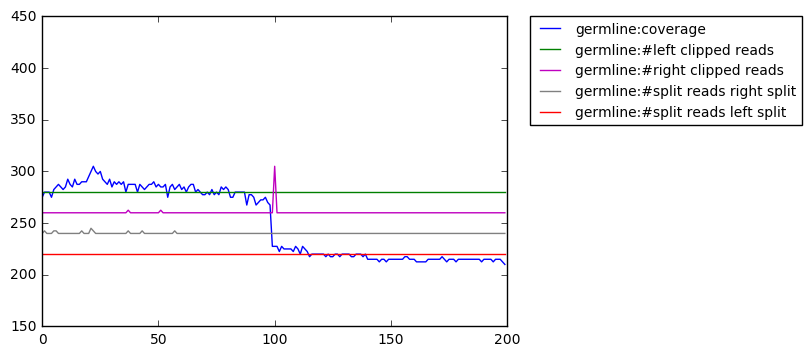

id: 534
Nanopore: 0


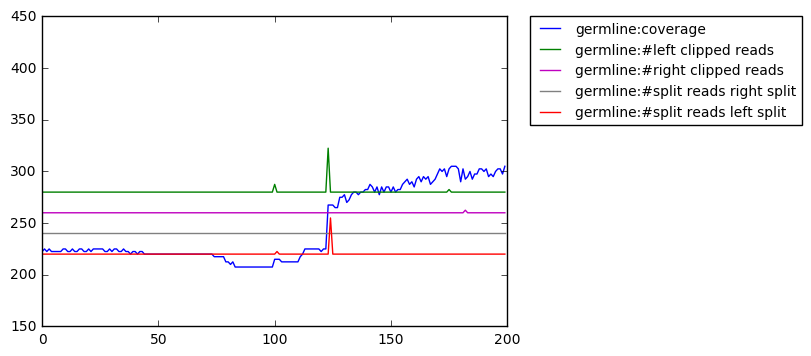

id: 535
Nanopore: 1


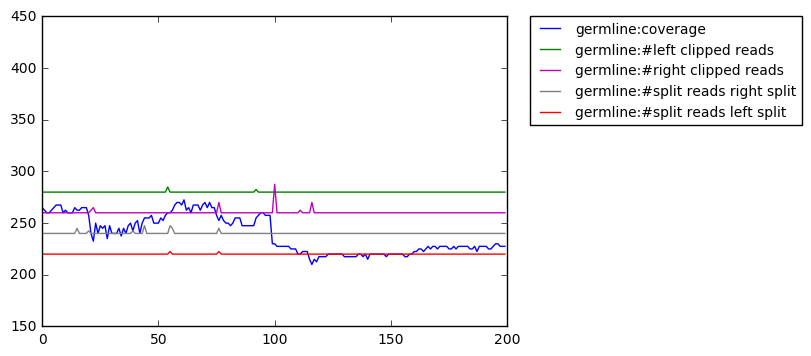

id: 536
Nanopore: 1


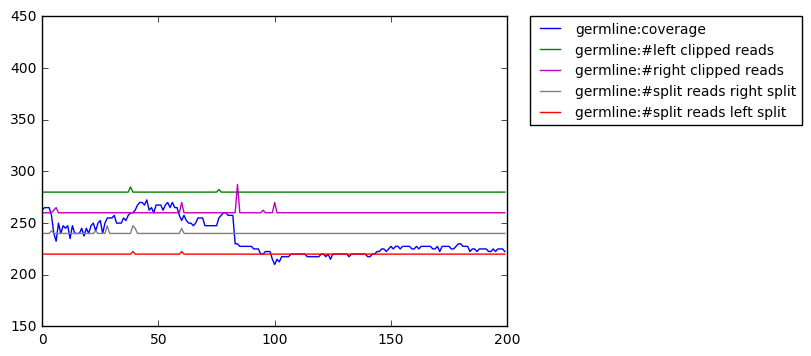

id: 537
Nanopore: 1


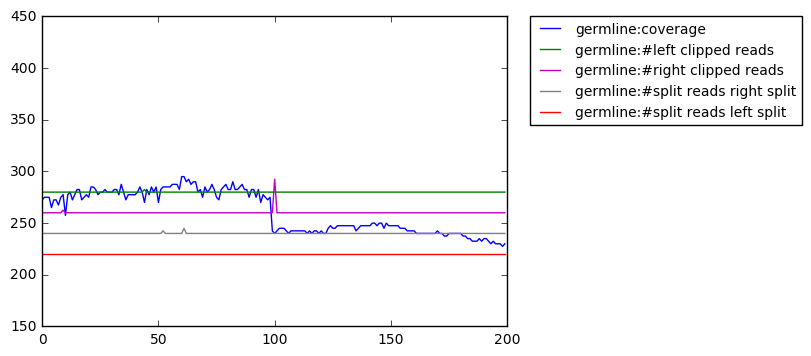

id: 538
Nanopore: 0


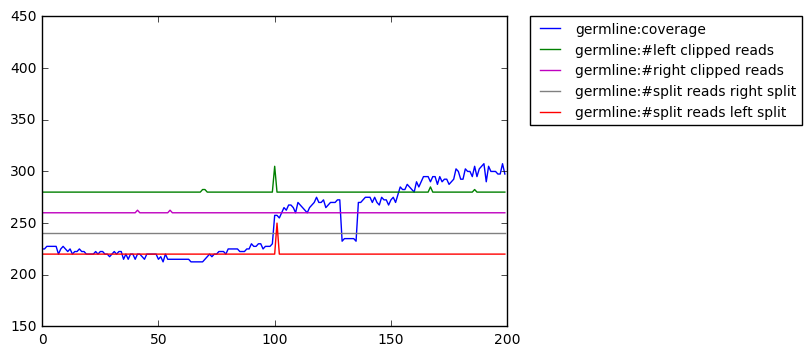

id: 539
Nanopore: 1


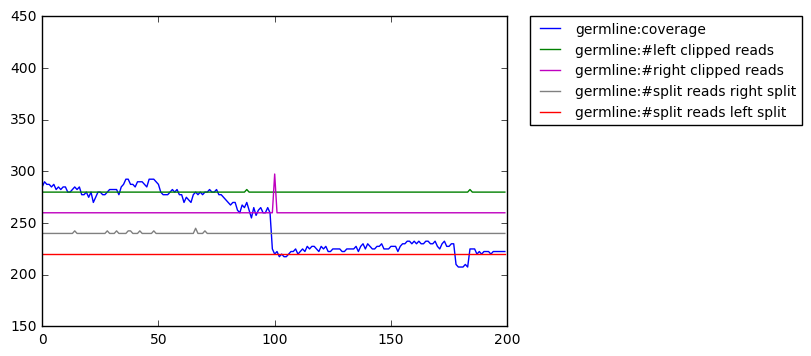

id: 540
Nanopore: 0


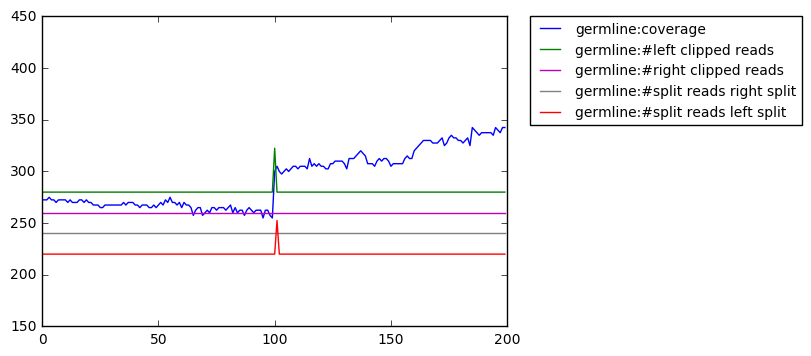

id: 541
Nanopore: 1


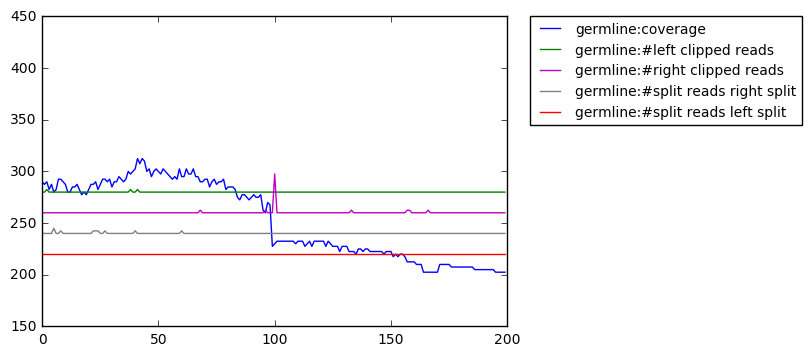

id: 542
Nanopore: 0


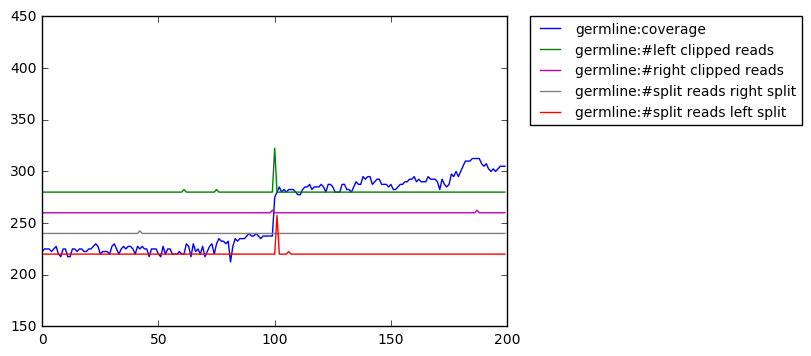

id: 543
Nanopore: 1


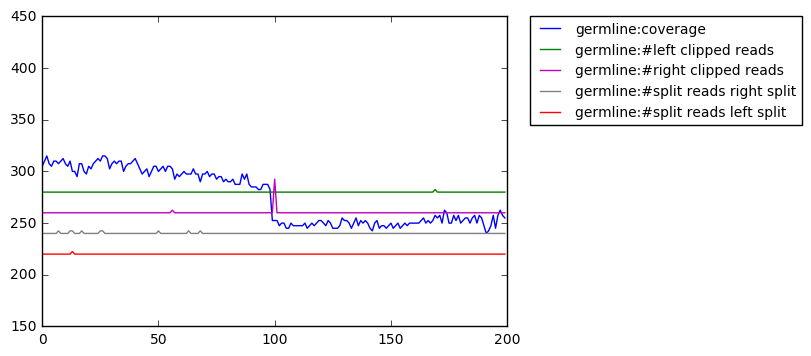

id: 544
Nanopore: 0


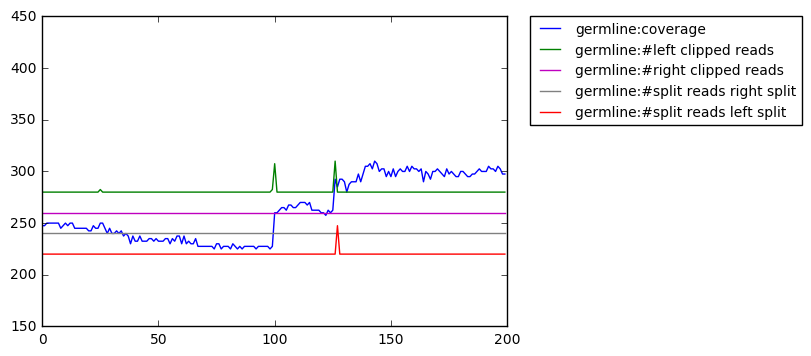

id: 545
Nanopore: 0


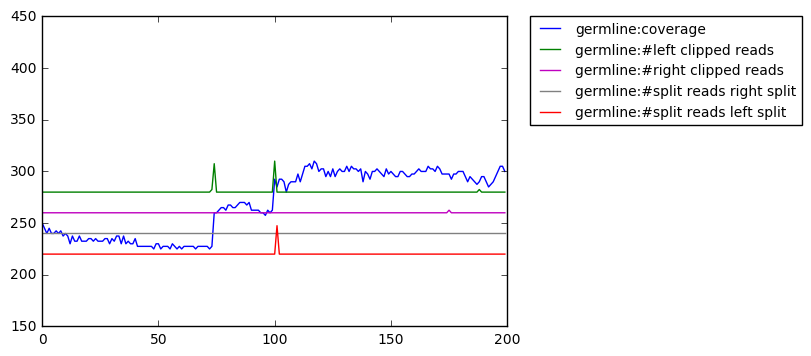

id: 546
Nanopore: 1


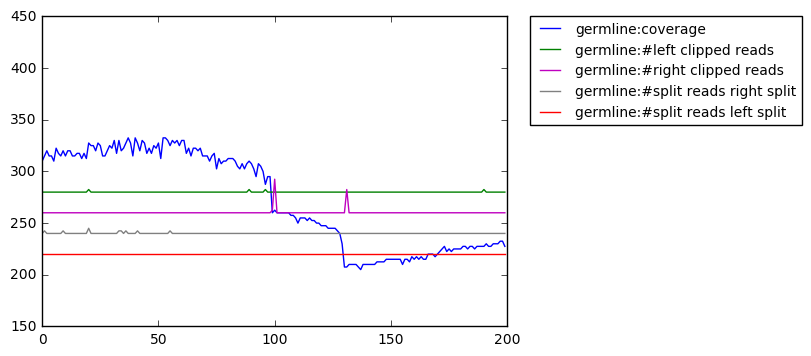

id: 547
Nanopore: 0


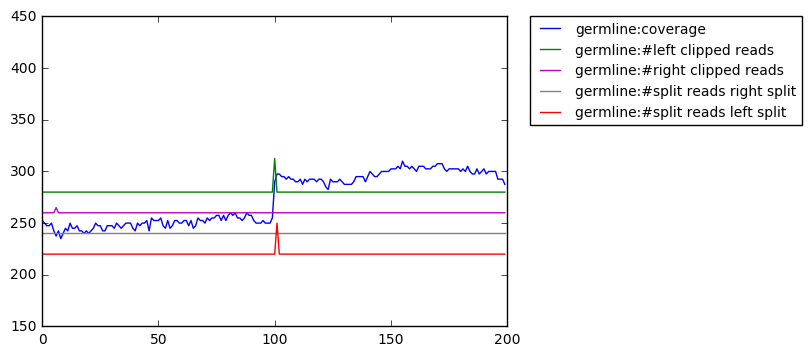

id: 548
Nanopore: 1


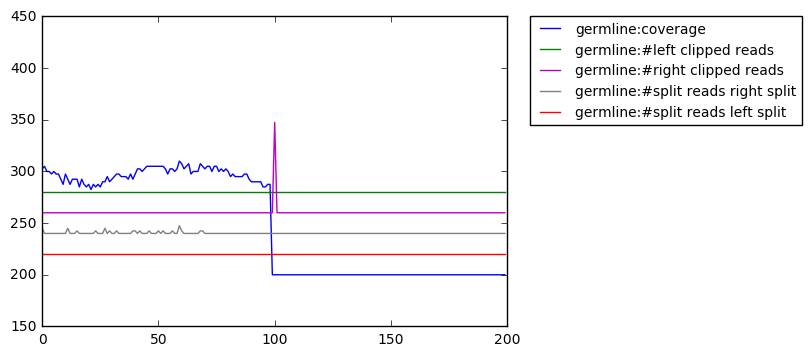

id: 549
Nanopore: 0


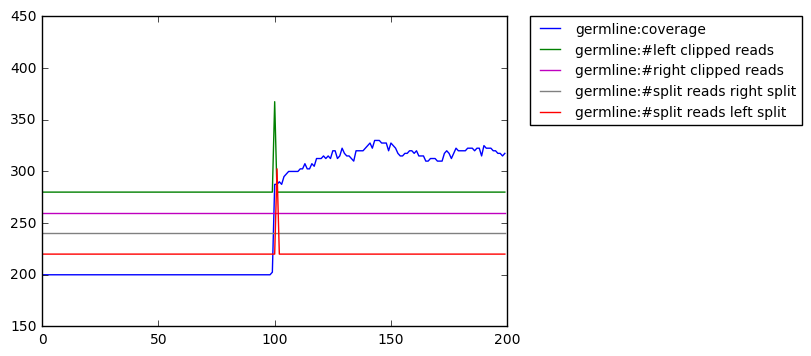

In [117]:
n_windows = 50
start_window = 500
plot_channels(start_window, n_windows)

   
## Transposes every window in X, to comply to McFly format

In [115]:
X_test[14][0][99]

0.0

In [116]:
X_test[14][0][100]

80.0

In [111]:
X_test[14][1][100]

80.0

In [118]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X -1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

image1 = transposeDataset(X_train)
image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

5


## Prepare the labels in McFly format

In [119]:
mapclasses = {'DEL_start': 1, 'DEL_end': 0,  'noSV': 2}
print(mapclasses)

{'DEL_start': 1, 'noSV': 2, 'DEL_end': 0}


In [ ]:
y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')

In [121]:
y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

In [122]:
y_test_binary

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [123]:
y_val_binary

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [60]:
X_train.shape

(17890, 200, 5)

##  Generate and train neural networks 

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [62]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_filters = 3, 
                                  cnn_max_filters = 3, 
                                  cnn_min_fc_nodes=2, 
                                  cnn_max_fc_nodes=2,
                                  low_lr=1.73, high_lr=1.73,
                                  kernel_size = 11)

In [125]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 10,
                                  model_type = 'CNN',
                                  cnn_min_layers=2,
                                  cnn_max_layers=2,
                                  cnn_min_filters =6, 
                                  cnn_max_filters = 6, 
                                  cnn_min_fc_nodes=4, 
                                  cnn_max_fc_nodes=4,
                                  low_lr=1, high_lr=3,
                                  kernel_size = 15)

Wall time: 37.3 s


In [126]:
%%time
i=0
for model, params, model_types in models:
    print('model ' + str(i))
    i=i+1
    print(params)
    model.summary()

model 0
{'kernel_size': 15, 'regularization_rate': 0.0001725168544017705, 'filters': array([6, 6]), 'fc_hidden_nodes': 4, 'learning_rate': 0.007705501439814256}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_155 (Bat (None, 200, 5)            20        
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 200, 6)            456       
_________________________________________________________________
batch_normalization_156 (Bat (None, 200, 6)            24        
_________________________________________________________________
activation_155 (Activation)  (None, 200, 6)            0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 200, 6)            546       
_________________________________________________________________
batch_normalization_157 (Bat (None, 200, 6)    

In [127]:
train_set_size = X_train.shape[0]
train_set_size

17890

In [128]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=1, 
                                                                                 subset_size=train_set_size,
                                                                                 verbose=True)

Training model 0 CNN
Train on 17890 samples, validate on 4480 samples
Epoch 1/1
17890/17890 [==============================] - 109s 6ms/step - loss: 0.3184 - acc: 0.9081 - val_loss: 1.9254 - val_acc: 0.2975
Training model 1 CNN
Train on 17890 samples, validate on 4480 samples
Epoch 1/1
17890/17890 [==============================] - 94s 5ms/step - loss: 0.3529 - acc: 0.9127 - val_loss: 2.8154 - val_acc: 0.3000
Training model 2 CNN
Train on 17890 samples, validate on 4480 samples
Epoch 1/1
17890/17890 [==============================] - 95s 5ms/step - loss: 0.4389 - acc: 0.8789 - val_loss: 2.6369 - val_acc: 0.2826
Training model 3 CNN
Train on 17890 samples, validate on 4480 samples
Epoch 1/1
17890/17890 [==============================] - 93s 5ms/step - loss: 0.3371 - acc: 0.9180 - val_loss: 1.1220 - val_acc: 0.3143
Training model 4 CNN
Train on 17890 samples, validate on 4480 samples
Epoch 1/1
17890/17890 [==============================] - 89s 5ms/step - loss: 0.6950 - acc: 0.8572 - val_

## Save the best model

In [102]:
best_model_index = np.argmax(val_accuracies)
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

7 CNN {'kernel_size': 21, 'regularization_rate': 0.00287749386510491, 'filters': array([2]), 'fc_hidden_nodes': 2, 'learning_rate': 0.0010932988921839668}


In [103]:
from keras.models import load_model

model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_29_10_16xoversample_NoDiff_onconfused')

best_model.save(model_path)

## Train the best model on the full dataset

In [104]:
#We make a copy of the model, to start training from fresh
nr_epochs = 1
datasize = train_set_size # Change in `X_train.shape[0]` if training complete data set
history = best_model.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              epochs=nr_epochs, validation_data=(X_val, y_val_binary))

Train on 17890 samples, validate on 4480 samples
Epoch 1/1
17890/17890 [==============================] - 38s 2ms/step - loss: 0.7062 - acc: 0.6157 - val_loss: 1.3196 - val_acc: 0.2989


## Reload the trained model

In [95]:
import os
from keras.models import load_model
model_path = os.path.join('F:/CNN/notebooks/',  'Gtcg_26_10_16xoversample_NoDiff_9749')
#model_path = os.path.join('F:/CNN/notebooks/',  'Gtcg_26_10_16xoversample_NoDiff_onconfused')
model_reloaded = load_model(model_path)

## Inspect model predictions on test data

In [83]:

model = model_reloaded 
datasize = X_test.shape[0]
probs = model.predict_proba(X_test[:datasize,:,:],batch_size=1)

## Columns are predicted labels by DeepSV, rows are nanopore labels

In [84]:
mapclasses = {'DEL_end': 0, 'DEL_start': 1, 'noSV': 2}
dict=mapclasses
dict_sorted = sorted(dict.items(), key=lambda x: x[1])
dict_sorted

[('DEL_end', 0), ('DEL_start', 1), ('noSV', 2)]

In [85]:
labels = [i[0] for i in dict_sorted]

In [86]:
import pandas as pd
predicted = probs.argmax(axis=1)
y_index = y_test_binary.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix

DEL_start  noSV
DEL_end         1057     0
DEL_start       1204     0
noSV            1219    45

## Test best current model on testset

### Overall accuracy on the test set:

In [87]:
%%time
score_test = model.evaluate(X_test, y_test_binary, verbose=False)
print('Test loss and accuracy of best model: ' + str(score_test))

Test loss and accuracy of best model: [1.5339999889481997, 0.35432624113475175]
Wall time: 2.89 s
